<a href="https://colab.research.google.com/github/salsair/11_ProjectUASFinal/blob/main/ML_Teo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
# ========================================
# BAB 1: IMPORT LIBRARY DAN PENGUMPULAN DATA
# ========================================
print("\n" + "="*50)
print("BAB 1: IMPORT LIBRARY DAN PENGUMPULAN DATA")
print("="*50)
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Pengumpulan Data
print("=== HEART DISEASE DATASET ===")

# Mengambil dataset dari UCI Machine Learning Repository
heart_disease = fetch_ucirepo(id=45)

# Menentukan fitur (X) dan target (y)
X = heart_disease.data.features
y = heart_disease.data.targets

# Menampilkan informasi dataset
df = pd.concat([X, y], axis=1)
print(df)
print(f"\nBentuk Dataset: {df.shape}")
print("\nInformasi Dataset:")
print(df.info())

# Menyimpan DataFrame ke file CSV
df.to_csv('heart_disease.csv', index=False)
print("\nDataset berhasil disimpan sebagai 'heart_disease.csv'")

# Menyimpan DataFrame ke file Excel
df.to_excel('heart_disease.xlsx', index=False)
print("Dataset berhasil disimpan sebagai 'heart_disease.xlsx'")


BAB 1: IMPORT LIBRARY DAN PENGUMPULAN DATA
=== HEART DISEASE DATASET ===
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   

In [ ]:
# ========================================
# BAB 2: DATA PREPROCESSING
# ========================================
print("\n" + "="*50)
print("BAB 2: DATA PREPROCESSING")
print("="*50)
# Filter hanya untuk dataset Cleveland
df_cleveland = df.copy()
# Rename kolom untuk interpretasi yang lebih mudah
column_mapping = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPain',
    'trestbps': 'RestingBloodPressure',
    'chol': 'Cholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseAngina',
    'oldpeak': 'OldPeak',
    'slope': 'STSlope',
    'ca': 'nMajorVessels',
    'thal': 'Thalium',
    'num': 'Status'
}
# Mengganti nama kolom berdasarkan mapping
df_cleveland = df_cleveland.rename(columns=column_mapping)
# Ubah target menjadi biner (0: tidak ada penyakit, 1: ada penyakit)
df_cleveland['Status'] = (df_cleveland['Status'] > 0).astype(int)

# ========================================
# 2.1 HANDLING MISSING VALUES
# ========================================
print("\n=== 2.1 HANDLING MISSING VALUES ===")
print("\nCek Missing values:")
print(df_cleveland.isnull().sum())
# Definisikan kolom numerical dan categorical
numerical_cols = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak', 'nMajorVessels']
categorical_cols = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina', 'STSlope', 'Thalium']
# Handling missing values numerik dengan median
num_imputer = SimpleImputer(strategy='median')
df_cleveland[numerical_cols] = num_imputer.fit_transform(df_cleveland[numerical_cols])
# Handling missing values kategorikal dengan modus
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleveland[categorical_cols] = cat_imputer.fit_transform(df_cleveland[categorical_cols])
print("\nMissing values setelah dihandling:")
print(df_cleveland.isnull().sum())

# ========================================
# 2.2 HANDLING OUTLIERS
# ========================================
print("\n=== 2.2 HANDLING OUTLIERS ===")
# Menampilkan dataset sebelum handling outliers
print("\nOriginal Data (before outlier handling):")
print(df_cleveland[numerical_cols].describe())
# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
# Cek dan handling outliers untuk setiap kolom numerik
for col in numerical_cols:
    if col in df_cleveland.columns:
        # Deteksi outliers menggunakan IQR
        outliers = detect_outliers_iqr(df_cleveland[col])
        n_outliers = outliers.sum()
        print(f"\nColumn: {col}")
        print(f"Number of outliers detected (IQR method): {n_outliers}")
        # Ganti outliers dengan median
        median_value = df_cleveland[col].median()
        df_cleveland[col] = np.where(outliers, median_value, df_cleveland[col])
        # Hitung ulang jumlah outliers setelah penanganan
        outliers_after = detect_outliers_iqr(df_cleveland[col])
        n_outliers_after = outliers_after.sum()
# Menampilkan data setelah dilakukan handling
print("\nData after outlier handling:")
print(df_cleveland[numerical_cols].describe())
# Pisahkan fitur dan target
X = df_cleveland.drop(columns='Status')
y = df_cleveland['Status']

# ========================================
# 2.3 DATA NORMALIZATION
# ========================================
print("\n=== 2.3 DATA NORMALIZATION ===")
# Buat salinan dari dataframe untuk Normalisasi Min-Max
df_normalized = df_cleveland.copy()
# Normalisasi Min-Max pada fitur numerik
min_max_scaler = MinMaxScaler()
df_normalized[numerical_cols] = min_max_scaler.fit_transform(df_normalized[numerical_cols])
print("\nDataset after Min-Max normalization:")
print(df_normalized[numerical_cols].head())


BAB 2: DATA PREPROCESSING

=== 2.1 HANDLING MISSING VALUES ===

Cek Missing values:
Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExerciseAngina          0
OldPeak                 0
STSlope                 0
nMajorVessels           4
Thalium                 2
Status                  0
dtype: int64

Missing values setelah dihandling:
Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExerciseAngina          0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

=== 2.2 HANDLING OUTLIERS ===

Original Data (before outlier handling):
              Age  RestingBloodPressure  Cholesterol

In [ ]:
# ========================================
# BAB 3: PEMILIHAN DAN IMPLEMENTASI ALGORITMA
# ========================================
print("\n" + "="*50)
print("BAB 3: PEMILIHAN DAN IMPLEMENTASI ALGORITMA")
print("="*50)
print("Pada pemilihan dan implementasi algoritma, kami menerapkan algoritma SVM dengan 4 jenis kernel, yaitu linear, polynomial, RBF, dan sigmoid.")


BAB 3: PEMILIHAN DAN IMPLEMENTASI ALGORITMA
Pada pemilihan dan implementasi algoritma, kami menerapkan algoritma SVM dengan 4 jenis kernel, yaitu linear, polynomial, RBF, dan sigmoid.


In [ ]:
# ========================================
# BAB 4: MODEL TRAINING
# ========================================
print("\n" + "="*50)
print("BAB 4: MODEL TRAINING")
print("="*50)
# Multiple data splits untuk analisis komprehensif
split_configs = [
    {'test_size': 0.4, 'train_size': 0.6, 'name': '60-40'},
    {'test_size': 0.3, 'train_size': 0.7, 'name': '70-30'},
    {'test_size': 0.2, 'train_size': 0.8, 'name': '80-20'}
]
# Dictionary untuk menyimpan data splits
data_splits = {}
for config in split_configs:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=config['test_size'], random_state=42, stratify=y
    )
    # Feature scaling untuk SVM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    data_splits[config['name']] = {
        'X_train': X_train, 'X_test': X_test,
        'y_train': y_train, 'y_test': y_test,
        'X_train_scaled': X_train_scaled, 'X_test_scaled': X_test_scaled,
        'scaler': scaler
    }

    print(f"\nSplit {config['name']}:")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")

# Konfigurasi model SVM yang akan diuji
svm_configs = [
    {'kernel': 'linear', 'C': 0.3, 'name': 'Linear (C=0.3)'},
    {'kernel': 'poly', 'C': 0.7, 'degree': 3, 'name': 'Polynomial (C=0.7)'},
    {'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale', 'name': 'RBF (C=1.0)'},
    {'kernel': 'sigmoid', 'C': 0.5, 'gamma': 'scale', 'name': 'Sigmoid (C=0.5)'}
]
# Fungsi untuk melatih dan mengevaluasi model SVM
def train_evaluate_svm(X_train, X_test, y_train, y_test, config):
    """Fungsi untuk melatih dan mengevaluasi model SVM"""
    # Buat parameter model
    params = {'kernel': config['kernel'], 'C': config['C'], 'random_state': 42}
    if 'degree' in config:
        params['degree'] = config['degree']
    if 'gamma' in config:
        params['gamma'] = config['gamma']

    model = SVC(**params)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return model, y_train_pred, y_test_pred


BAB 4: MODEL TRAINING

Split 60-40:
Training set: 181 samples
Testing set: 122 samples

Split 70-30:
Training set: 212 samples
Testing set: 91 samples

Split 80-20:
Training set: 242 samples
Testing set: 61 samples



BAB 5: EVALUASI MODEL

EVALUASI UNTUK DATA SPLIT: 60-40

------------------------------------------------------------
Model: Linear (C=0.3) - Data: Original - Split: 60-40
------------------------------------------------------------
Confusion Matrix - Training:
[[90  8]
 [21 62]]

Confusion Matrix - Testing:
[[58  8]
 [10 46]]


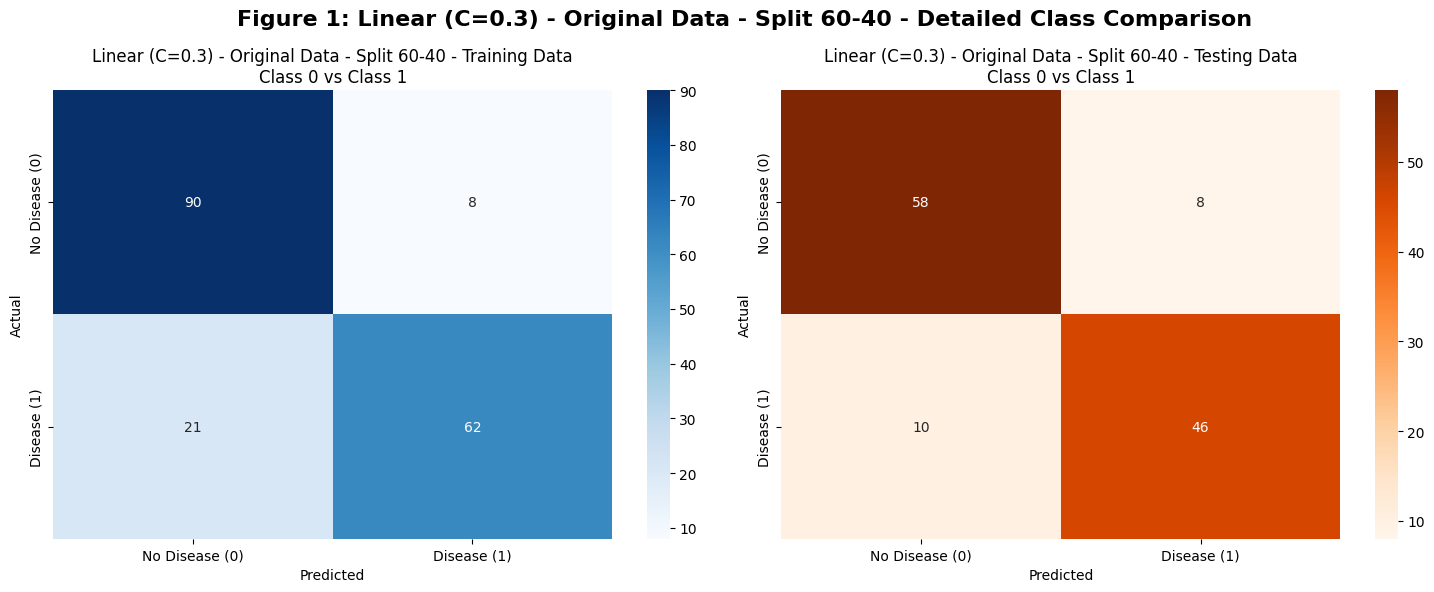


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 98         | 111        |
| 1         | 83         | 70         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 66         | 68         |
| 1         | 56         | 54         |
+-----------+------------+------------+

Linear (C=0.3) (Original) - Training Metrics:
Overall Accuracy:  0.8398

Class 0 (No Disease):
• Precision: 0.8108
• Recall:    0.9184
• F1-Score:  0.8612

Class 1 (Disease):
• Precision: 0.8857
• Recall:    0.7470
• F1-Score:  0.8105

Macro Avg:
• Precision: 0.8483
• Recall:    0.8327
• F1-Score:  0.8359

Linear (C=0.3) (Original) - Testing Metrics:
Overall Accuracy:  0.8525

Class 0 (No Disease):
• Precision: 0.8529
• Recall:    0.8788
• F1

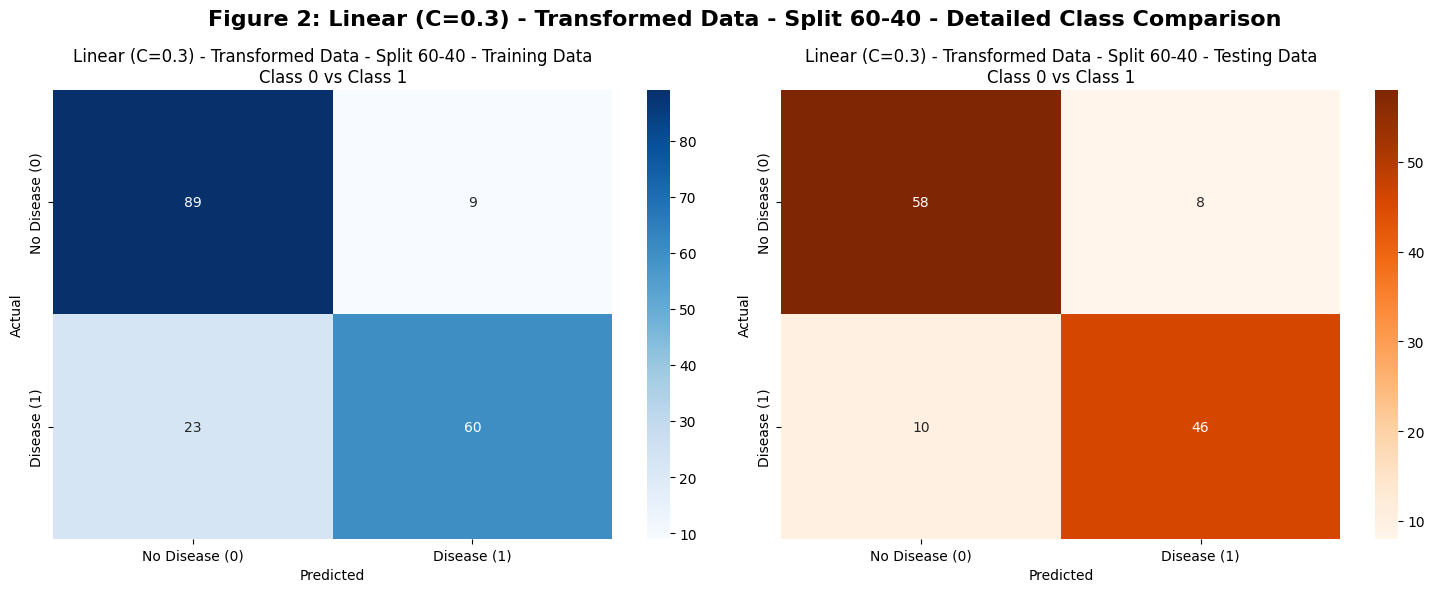


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 98         | 112        |
| 1         | 83         | 69         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 66         | 68         |
| 1         | 56         | 54         |
+-----------+------------+------------+

Linear (C=0.3) (Transformed) - Training Metrics:
Overall Accuracy:  0.8232

Class 0 (No Disease):
• Precision: 0.7946
• Recall:    0.9082
• F1-Score:  0.8476

Class 1 (Disease):
• Precision: 0.8696
• Recall:    0.7229
• F1-Score:  0.7895

Macro Avg:
• Precision: 0.8321
• Recall:    0.8155
• F1-Score:  0.8185

Linear (C=0.3) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8525

Class 0 (No Disease):
• Precision: 0.8529
• Recall:    0.878

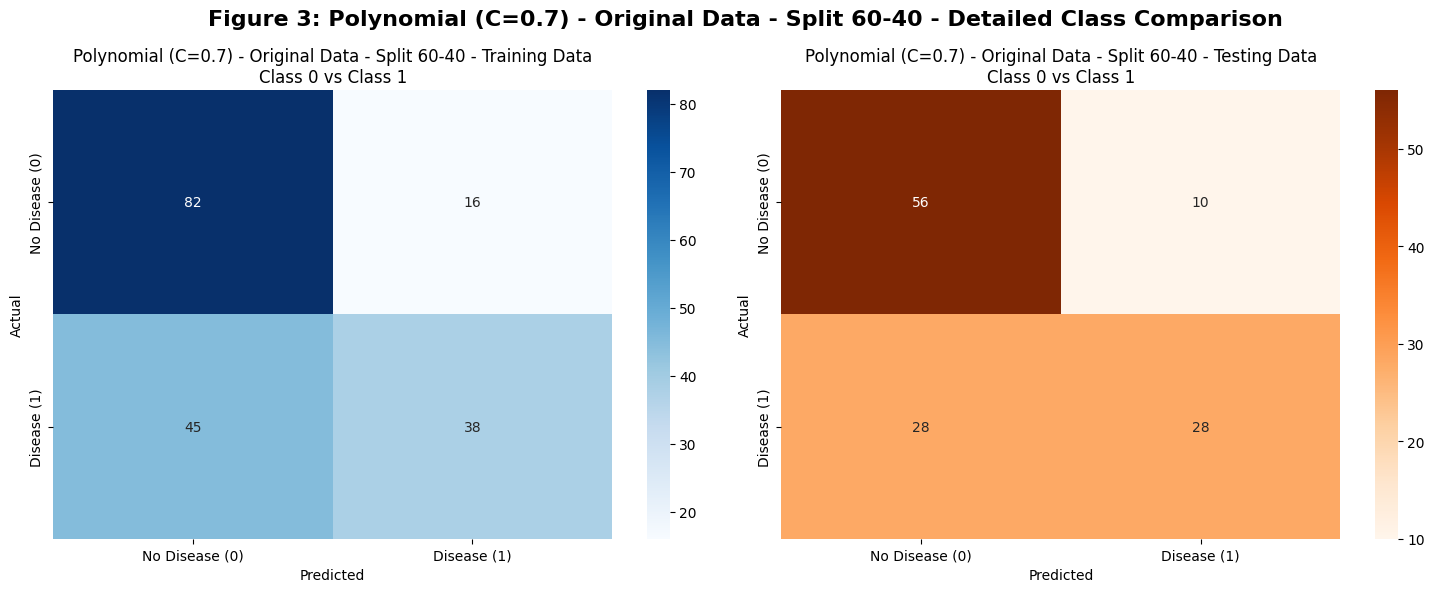


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 98         | 127        |
| 1         | 83         | 54         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 66         | 84         |
| 1         | 56         | 38         |
+-----------+------------+------------+

Polynomial (C=0.7) (Original) - Training Metrics:
Overall Accuracy:  0.6630

Class 0 (No Disease):
• Precision: 0.6457
• Recall:    0.8367
• F1-Score:  0.7289

Class 1 (Disease):
• Precision: 0.7037
• Recall:    0.4578
• F1-Score:  0.5547

Macro Avg:
• Precision: 0.6747
• Recall:    0.6473
• F1-Score:  0.6418

Polynomial (C=0.7) (Original) - Testing Metrics:
Overall Accuracy:  0.6885

Class 0 (No Disease):
• Precision: 0.6667
• Recall:    0.8

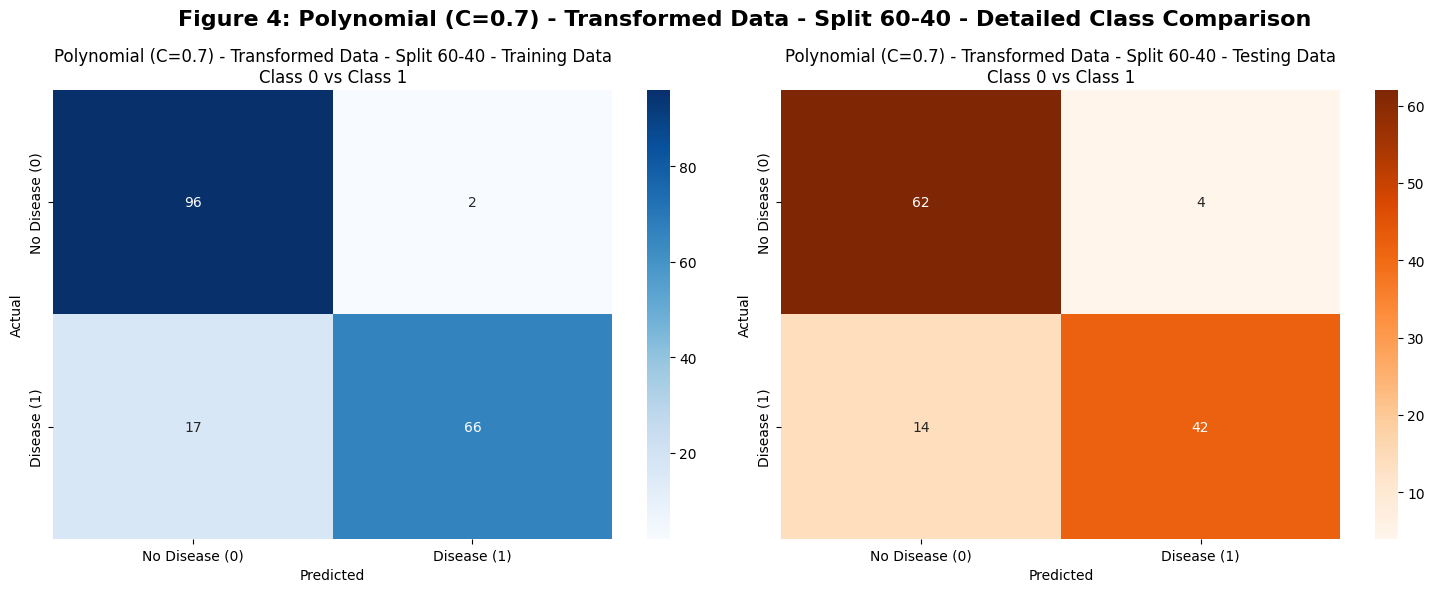


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 98         | 113        |
| 1         | 83         | 68         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 66         | 76         |
| 1         | 56         | 46         |
+-----------+------------+------------+

Polynomial (C=0.7) (Transformed) - Training Metrics:
Overall Accuracy:  0.8950

Class 0 (No Disease):
• Precision: 0.8496
• Recall:    0.9796
• F1-Score:  0.9100

Class 1 (Disease):
• Precision: 0.9706
• Recall:    0.7952
• F1-Score:  0.8742

Macro Avg:
• Precision: 0.9101
• Recall:    0.8874
• F1-Score:  0.8921

Polynomial (C=0.7) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8525

Class 0 (No Disease):
• Precision: 0.8158
• Recall: 

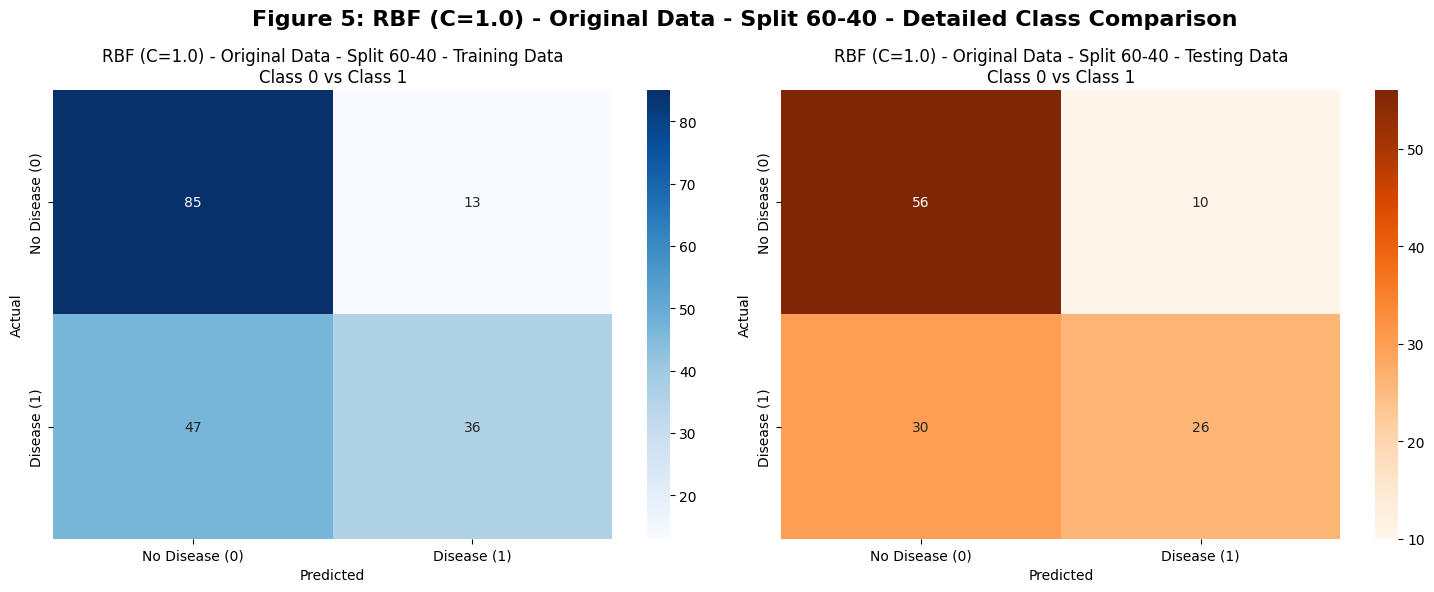


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 98         | 132        |
| 1         | 83         | 49         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 66         | 86         |
| 1         | 56         | 36         |
+-----------+------------+------------+

RBF (C=1.0) (Original) - Training Metrics:
Overall Accuracy:  0.6685

Class 0 (No Disease):
• Precision: 0.6439
• Recall:    0.8673
• F1-Score:  0.7391

Class 1 (Disease):
• Precision: 0.7347
• Recall:    0.4337
• F1-Score:  0.5455

Macro Avg:
• Precision: 0.6893
• Recall:    0.6505
• F1-Score:  0.6423

RBF (C=1.0) (Original) - Testing Metrics:
Overall Accuracy:  0.6721

Class 0 (No Disease):
• Precision: 0.6512
• Recall:    0.8485
• F1-Score

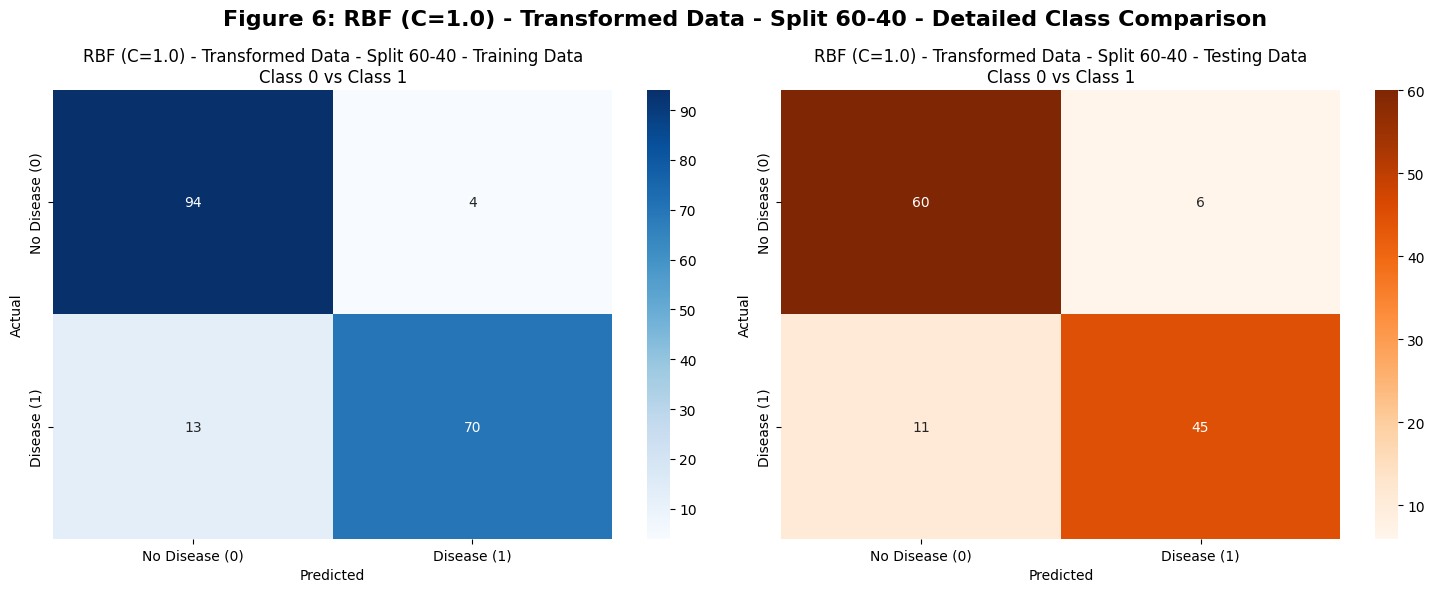


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 98         | 107        |
| 1         | 83         | 74         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 66         | 71         |
| 1         | 56         | 51         |
+-----------+------------+------------+

RBF (C=1.0) (Transformed) - Training Metrics:
Overall Accuracy:  0.9061

Class 0 (No Disease):
• Precision: 0.8785
• Recall:    0.9592
• F1-Score:  0.9171

Class 1 (Disease):
• Precision: 0.9459
• Recall:    0.8434
• F1-Score:  0.8917

Macro Avg:
• Precision: 0.9122
• Recall:    0.9013
• F1-Score:  0.9044

RBF (C=1.0) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8607

Class 0 (No Disease):
• Precision: 0.8451
• Recall:    0.9091
• F1

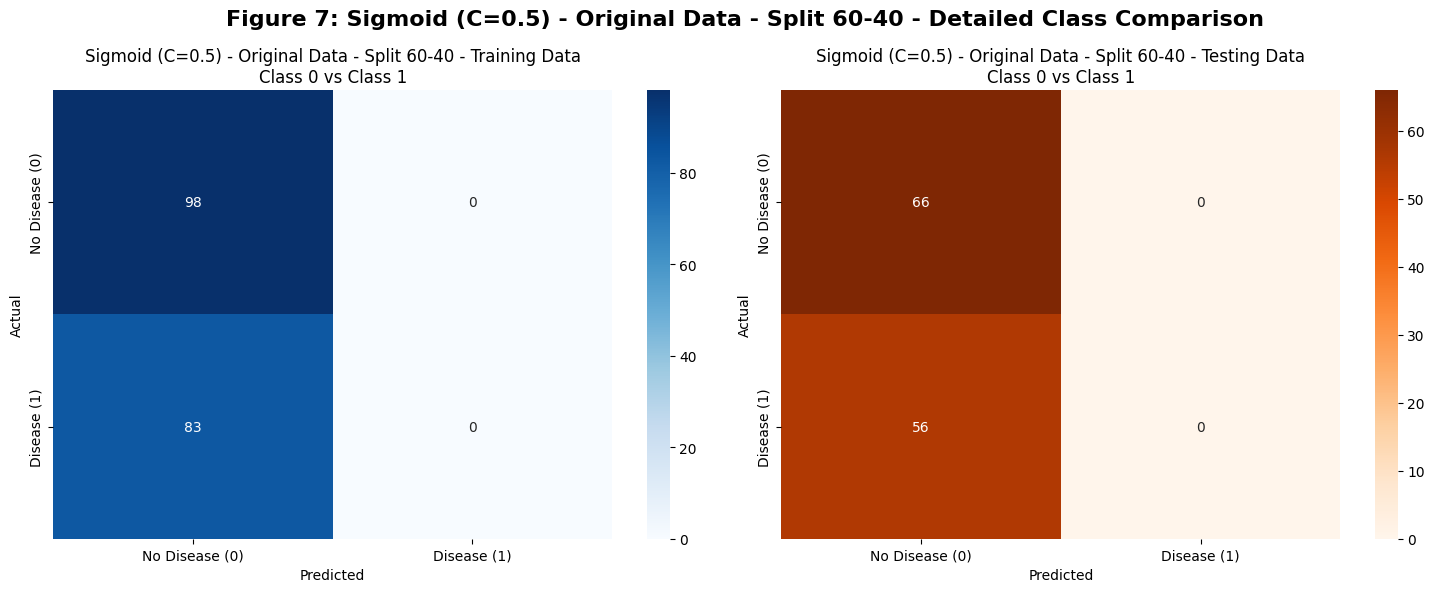


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 98         | 181        |
| 1         | 83         | 0          |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 66         | 122        |
| 1         | 56         | 0          |
+-----------+------------+------------+

Sigmoid (C=0.5) (Original) - Training Metrics:
Overall Accuracy:  0.5414

Class 0 (No Disease):
• Precision: 0.5414
• Recall:    1.0000
• F1-Score:  0.7025

Class 1 (Disease):
• Precision: 0.0000
• Recall:    0.0000
• F1-Score:  0.0000

Macro Avg:
• Precision: 0.2707
• Recall:    0.5000
• F1-Score:  0.3513

Sigmoid (C=0.5) (Original) - Testing Metrics:
Overall Accuracy:  0.5410

Class 0 (No Disease):
• Precision: 0.5410
• Recall:    1.0000
• 

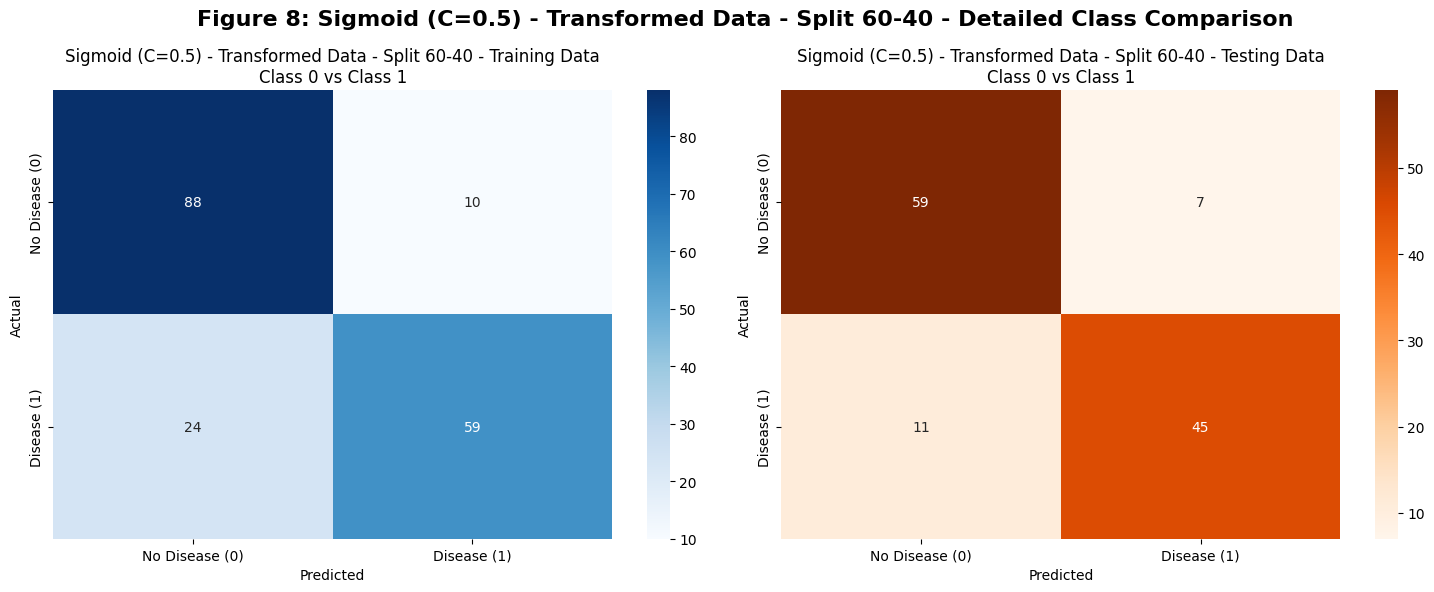


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 98         | 112        |
| 1         | 83         | 69         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 66         | 70         |
| 1         | 56         | 52         |
+-----------+------------+------------+

Sigmoid (C=0.5) (Transformed) - Training Metrics:
Overall Accuracy:  0.8122

Class 0 (No Disease):
• Precision: 0.7857
• Recall:    0.8980
• F1-Score:  0.8381

Class 1 (Disease):
• Precision: 0.8551
• Recall:    0.7108
• F1-Score:  0.7763

Macro Avg:
• Precision: 0.8204
• Recall:    0.8044
• F1-Score:  0.8072

Sigmoid (C=0.5) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8525

Class 0 (No Disease):
• Precision: 0.8429
• Recall:    0.8

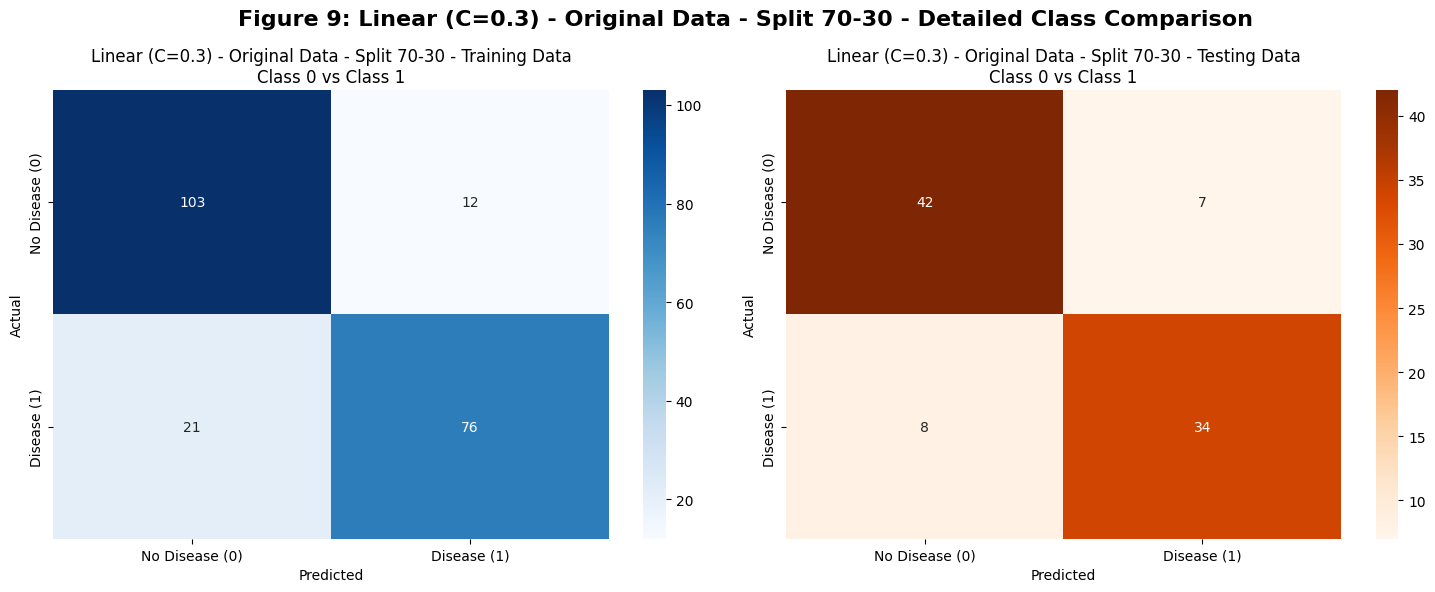


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 115        | 124        |
| 1         | 97         | 88         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 49         | 50         |
| 1         | 42         | 41         |
+-----------+------------+------------+

Linear (C=0.3) (Original) - Training Metrics:
Overall Accuracy:  0.8443

Class 0 (No Disease):
• Precision: 0.8306
• Recall:    0.8957
• F1-Score:  0.8619

Class 1 (Disease):
• Precision: 0.8636
• Recall:    0.7835
• F1-Score:  0.8216

Macro Avg:
• Precision: 0.8471
• Recall:    0.8396
• F1-Score:  0.8418

Linear (C=0.3) (Original) - Testing Metrics:
Overall Accuracy:  0.8352

Class 0 (No Disease):
• Precision: 0.8400
• Recall:    0.8571
• F1

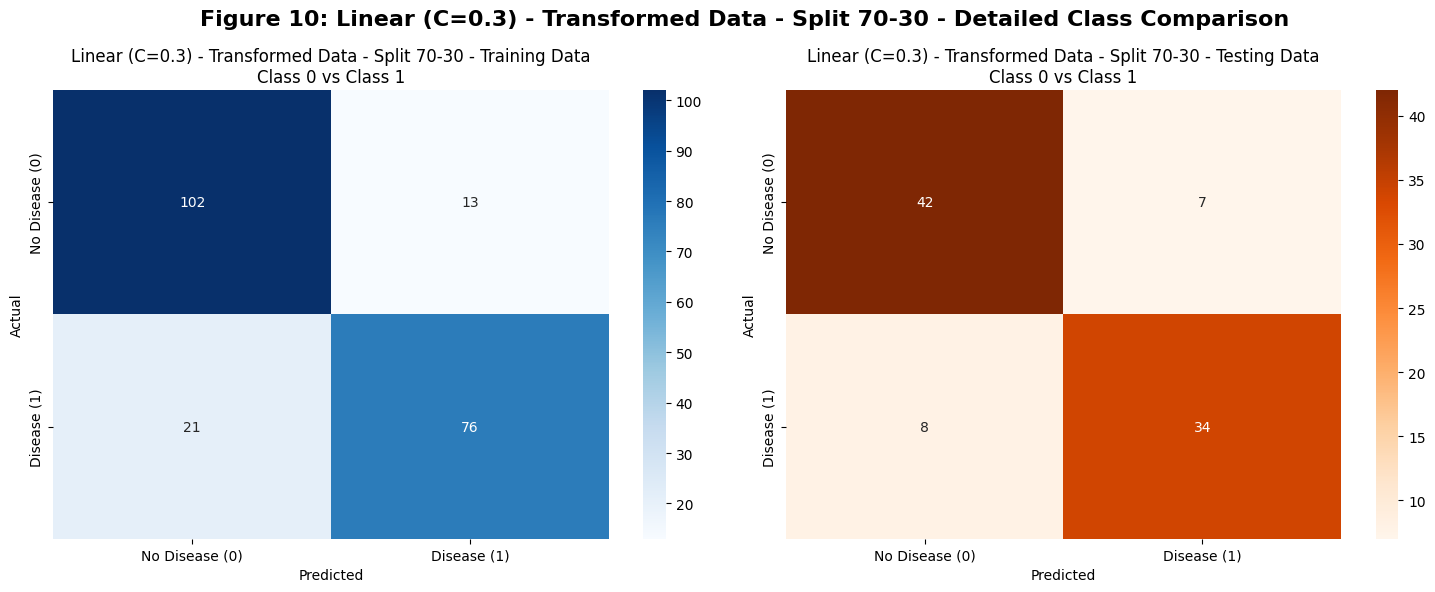


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 115        | 123        |
| 1         | 97         | 89         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 49         | 50         |
| 1         | 42         | 41         |
+-----------+------------+------------+

Linear (C=0.3) (Transformed) - Training Metrics:
Overall Accuracy:  0.8396

Class 0 (No Disease):
• Precision: 0.8293
• Recall:    0.8870
• F1-Score:  0.8571

Class 1 (Disease):
• Precision: 0.8539
• Recall:    0.7835
• F1-Score:  0.8172

Macro Avg:
• Precision: 0.8416
• Recall:    0.8352
• F1-Score:  0.8372

Linear (C=0.3) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8352

Class 0 (No Disease):
• Precision: 0.8400
• Recall:    0.857

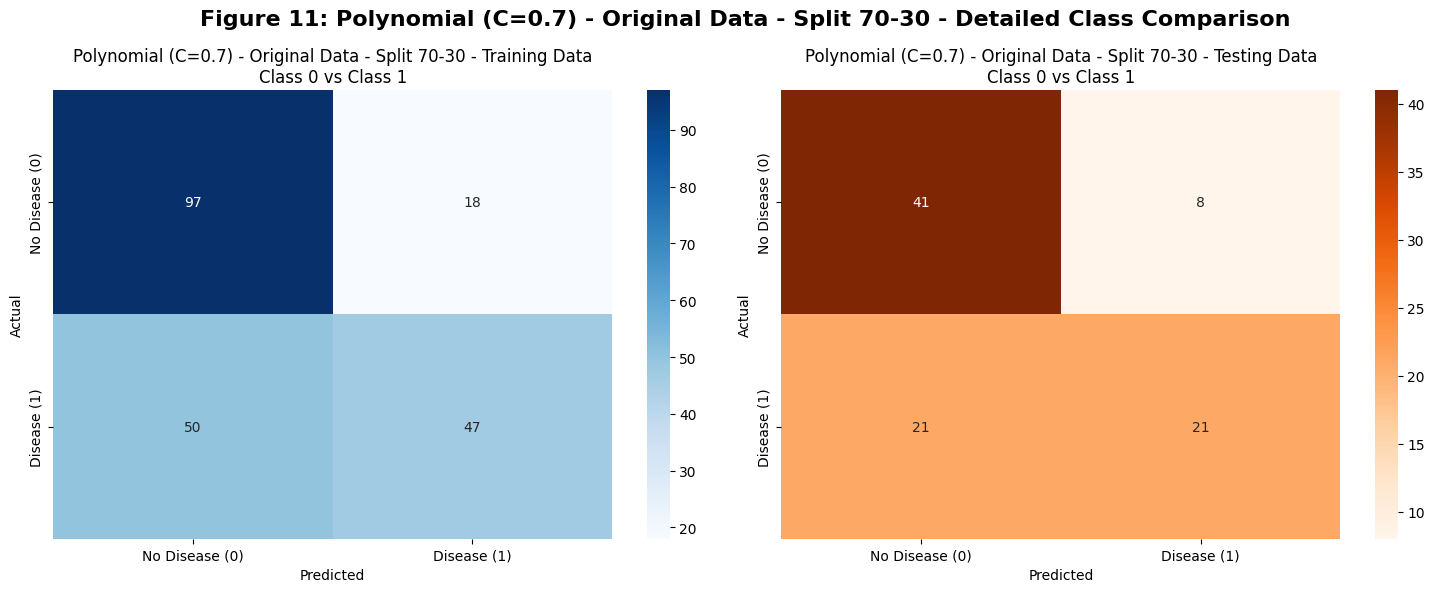


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 115        | 147        |
| 1         | 97         | 65         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 49         | 62         |
| 1         | 42         | 29         |
+-----------+------------+------------+

Polynomial (C=0.7) (Original) - Training Metrics:
Overall Accuracy:  0.6792

Class 0 (No Disease):
• Precision: 0.6599
• Recall:    0.8435
• F1-Score:  0.7405

Class 1 (Disease):
• Precision: 0.7231
• Recall:    0.4845
• F1-Score:  0.5802

Macro Avg:
• Precision: 0.6915
• Recall:    0.6640
• F1-Score:  0.6604

Polynomial (C=0.7) (Original) - Testing Metrics:
Overall Accuracy:  0.6813

Class 0 (No Disease):
• Precision: 0.6613
• Recall:    0.8

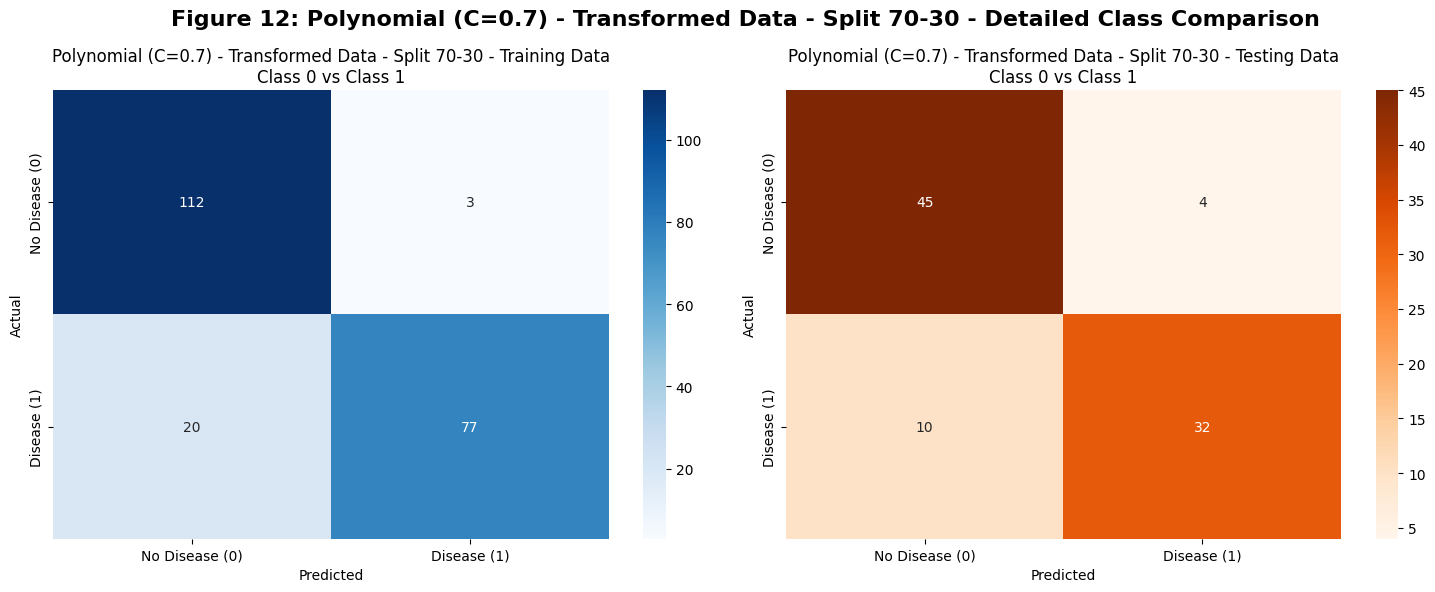


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 115        | 132        |
| 1         | 97         | 80         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 49         | 55         |
| 1         | 42         | 36         |
+-----------+------------+------------+

Polynomial (C=0.7) (Transformed) - Training Metrics:
Overall Accuracy:  0.8915

Class 0 (No Disease):
• Precision: 0.8485
• Recall:    0.9739
• F1-Score:  0.9069

Class 1 (Disease):
• Precision: 0.9625
• Recall:    0.7938
• F1-Score:  0.8701

Macro Avg:
• Precision: 0.9055
• Recall:    0.8839
• F1-Score:  0.8885

Polynomial (C=0.7) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8462

Class 0 (No Disease):
• Precision: 0.8182
• Recall: 

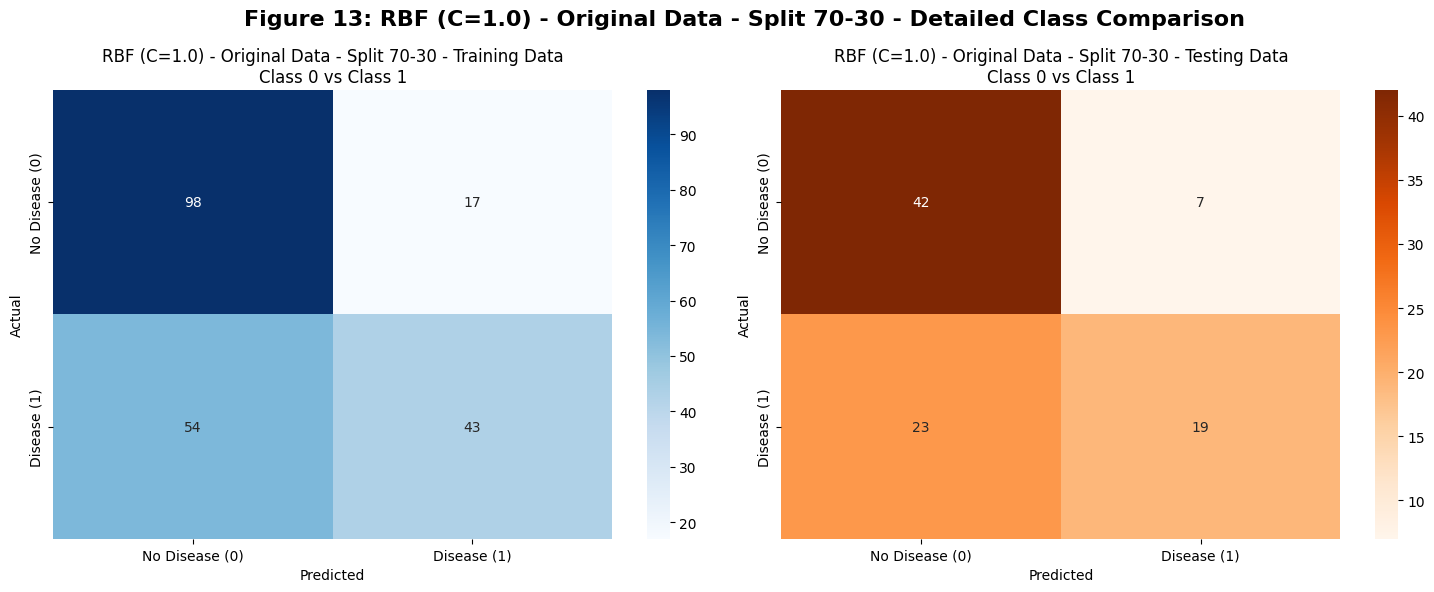


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 115        | 152        |
| 1         | 97         | 60         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 49         | 65         |
| 1         | 42         | 26         |
+-----------+------------+------------+

RBF (C=1.0) (Original) - Training Metrics:
Overall Accuracy:  0.6651

Class 0 (No Disease):
• Precision: 0.6447
• Recall:    0.8522
• F1-Score:  0.7341

Class 1 (Disease):
• Precision: 0.7167
• Recall:    0.4433
• F1-Score:  0.5478

Macro Avg:
• Precision: 0.6807
• Recall:    0.6477
• F1-Score:  0.6409

RBF (C=1.0) (Original) - Testing Metrics:
Overall Accuracy:  0.6703

Class 0 (No Disease):
• Precision: 0.6462
• Recall:    0.8571
• F1-Score

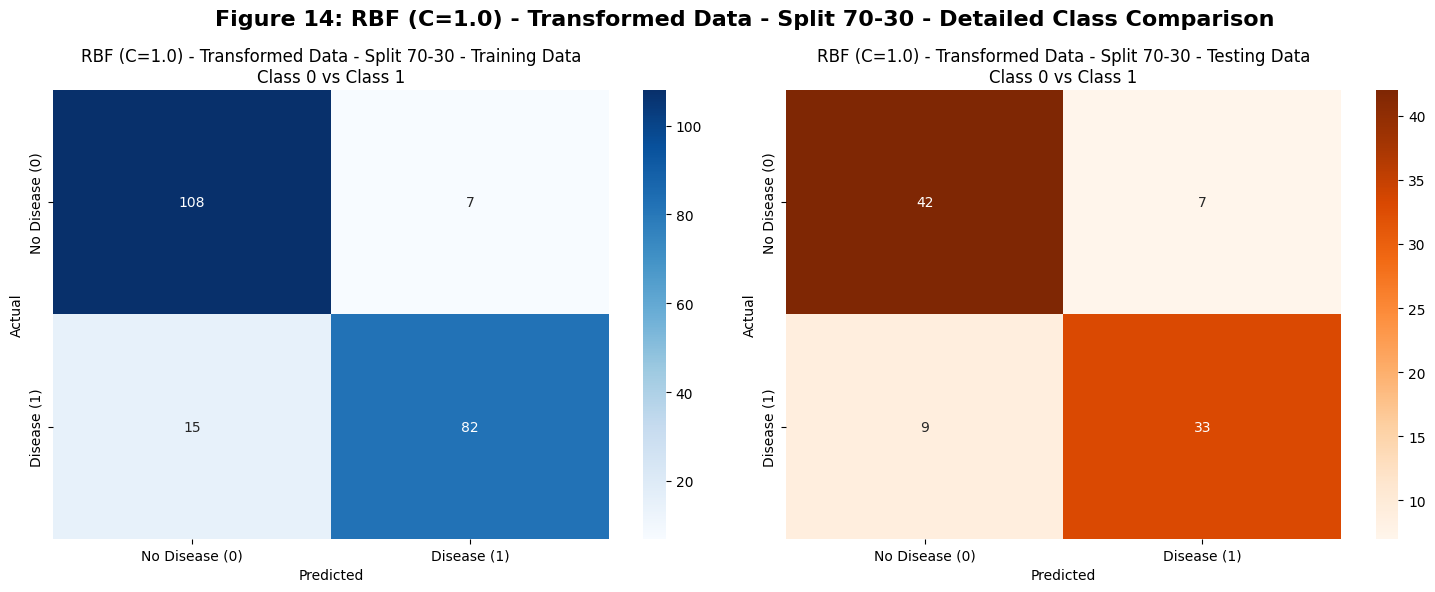


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 115        | 123        |
| 1         | 97         | 89         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 49         | 51         |
| 1         | 42         | 40         |
+-----------+------------+------------+

RBF (C=1.0) (Transformed) - Training Metrics:
Overall Accuracy:  0.8962

Class 0 (No Disease):
• Precision: 0.8780
• Recall:    0.9391
• F1-Score:  0.9076

Class 1 (Disease):
• Precision: 0.9213
• Recall:    0.8454
• F1-Score:  0.8817

Macro Avg:
• Precision: 0.8997
• Recall:    0.8922
• F1-Score:  0.8946

RBF (C=1.0) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8242

Class 0 (No Disease):
• Precision: 0.8235
• Recall:    0.8571
• F1

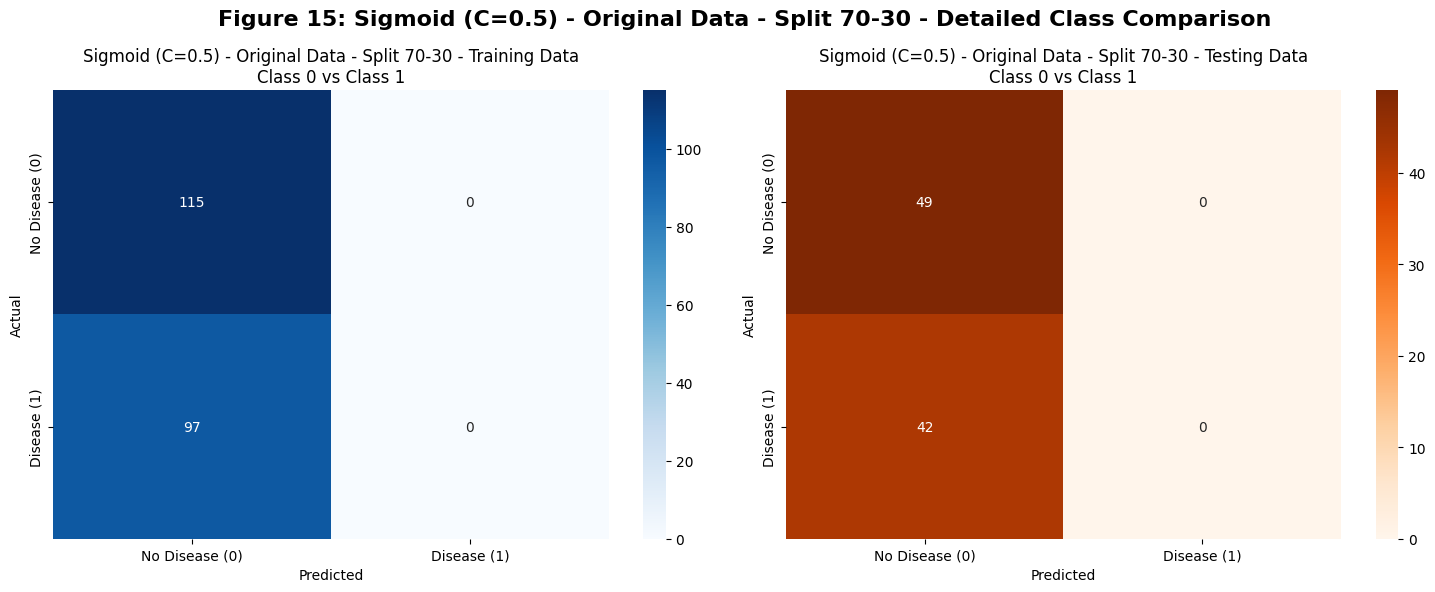


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 115        | 212        |
| 1         | 97         | 0          |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 49         | 91         |
| 1         | 42         | 0          |
+-----------+------------+------------+

Sigmoid (C=0.5) (Original) - Training Metrics:
Overall Accuracy:  0.5425

Class 0 (No Disease):
• Precision: 0.5425
• Recall:    1.0000
• F1-Score:  0.7034

Class 1 (Disease):
• Precision: 0.0000
• Recall:    0.0000
• F1-Score:  0.0000

Macro Avg:
• Precision: 0.2712
• Recall:    0.5000
• F1-Score:  0.3517

Sigmoid (C=0.5) (Original) - Testing Metrics:
Overall Accuracy:  0.5385

Class 0 (No Disease):
• Precision: 0.5385
• Recall:    1.0000
• 

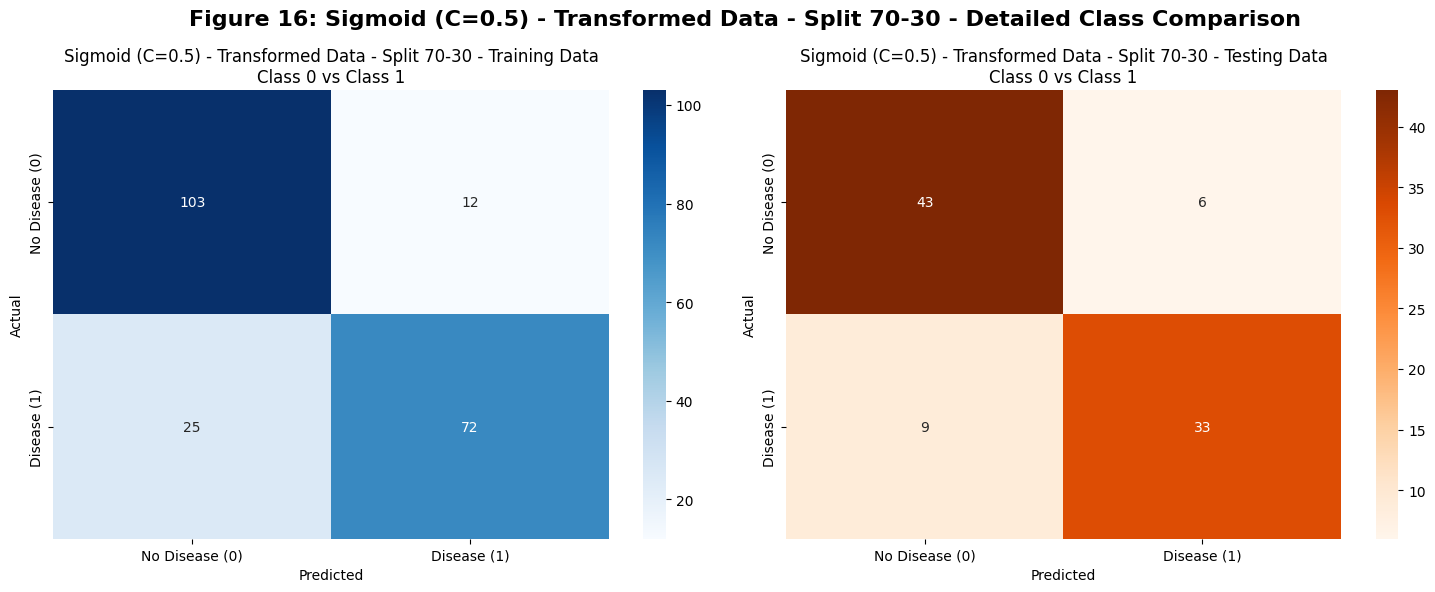


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 115        | 128        |
| 1         | 97         | 84         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 49         | 52         |
| 1         | 42         | 39         |
+-----------+------------+------------+

Sigmoid (C=0.5) (Transformed) - Training Metrics:
Overall Accuracy:  0.8255

Class 0 (No Disease):
• Precision: 0.8047
• Recall:    0.8957
• F1-Score:  0.8477

Class 1 (Disease):
• Precision: 0.8571
• Recall:    0.7423
• F1-Score:  0.7956

Macro Avg:
• Precision: 0.8309
• Recall:    0.8190
• F1-Score:  0.8217

Sigmoid (C=0.5) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8352

Class 0 (No Disease):
• Precision: 0.8269
• Recall:    0.8

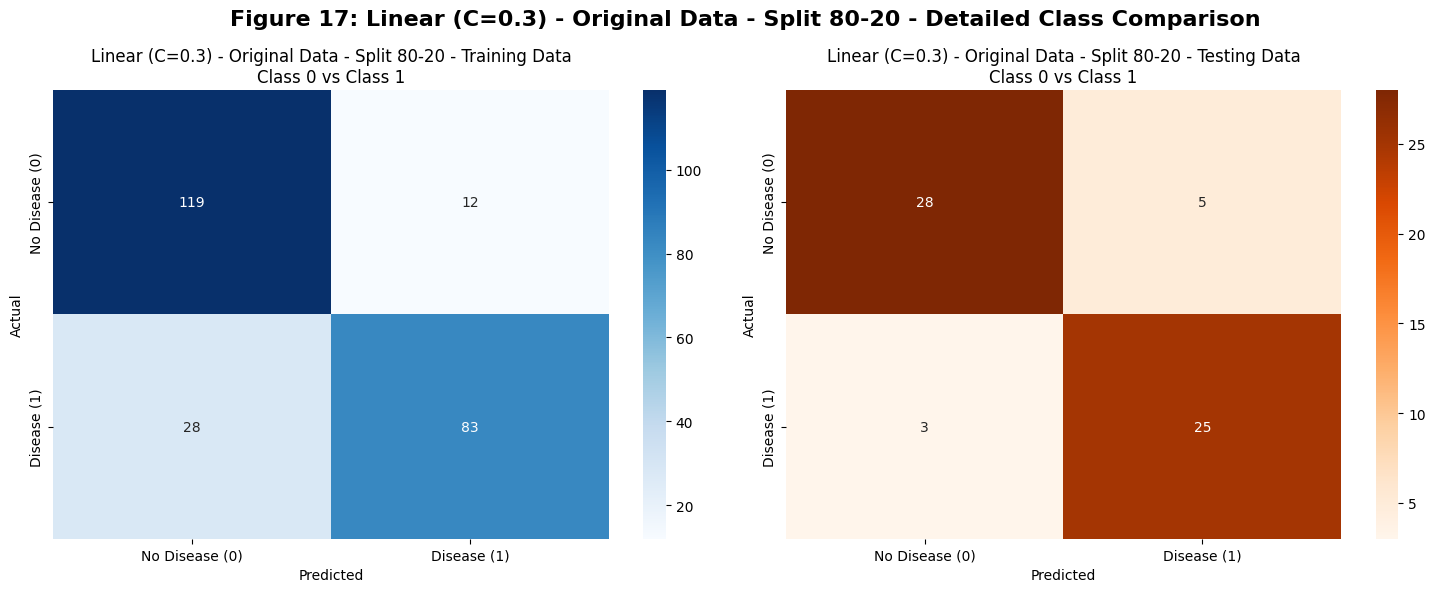


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 131        | 147        |
| 1         | 111        | 95         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 33         | 31         |
| 1         | 28         | 30         |
+-----------+------------+------------+

Linear (C=0.3) (Original) - Training Metrics:
Overall Accuracy:  0.8347

Class 0 (No Disease):
• Precision: 0.8095
• Recall:    0.9084
• F1-Score:  0.8561

Class 1 (Disease):
• Precision: 0.8737
• Recall:    0.7477
• F1-Score:  0.8058

Macro Avg:
• Precision: 0.8416
• Recall:    0.8281
• F1-Score:  0.8310

Linear (C=0.3) (Original) - Testing Metrics:
Overall Accuracy:  0.8689

Class 0 (No Disease):
• Precision: 0.9032
• Recall:    0.8485
• F1

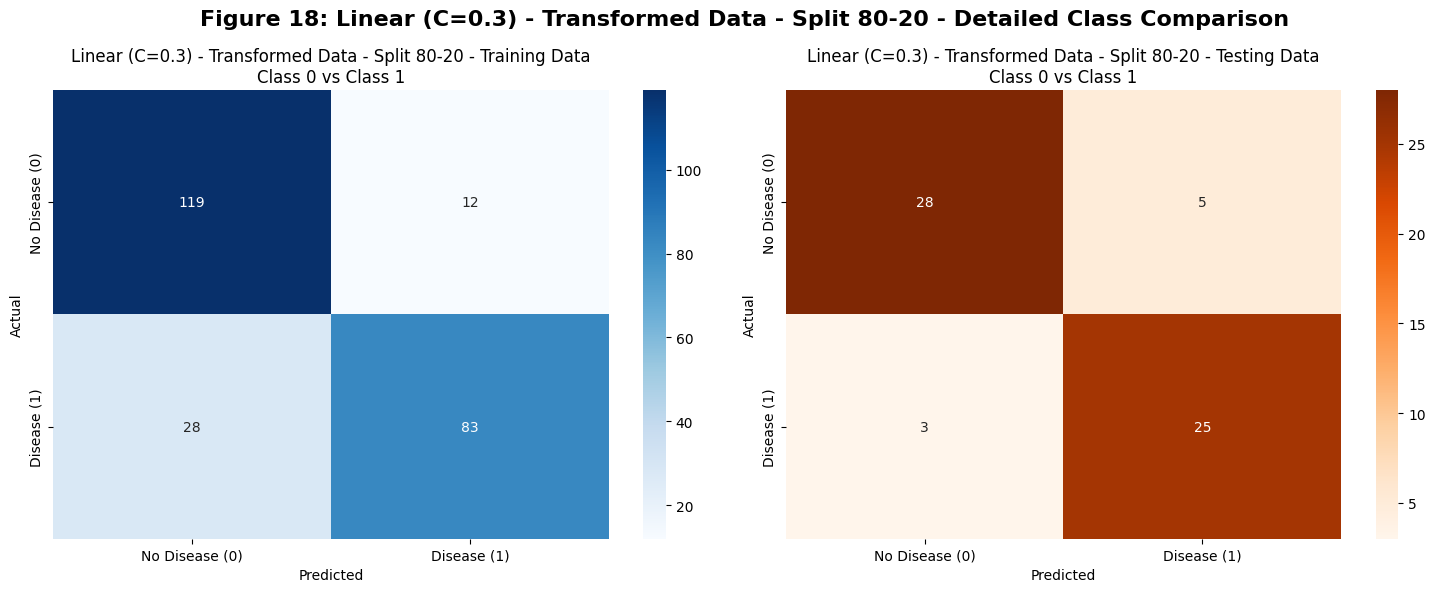


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 131        | 147        |
| 1         | 111        | 95         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 33         | 31         |
| 1         | 28         | 30         |
+-----------+------------+------------+

Linear (C=0.3) (Transformed) - Training Metrics:
Overall Accuracy:  0.8347

Class 0 (No Disease):
• Precision: 0.8095
• Recall:    0.9084
• F1-Score:  0.8561

Class 1 (Disease):
• Precision: 0.8737
• Recall:    0.7477
• F1-Score:  0.8058

Macro Avg:
• Precision: 0.8416
• Recall:    0.8281
• F1-Score:  0.8310

Linear (C=0.3) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8689

Class 0 (No Disease):
• Precision: 0.9032
• Recall:    0.848

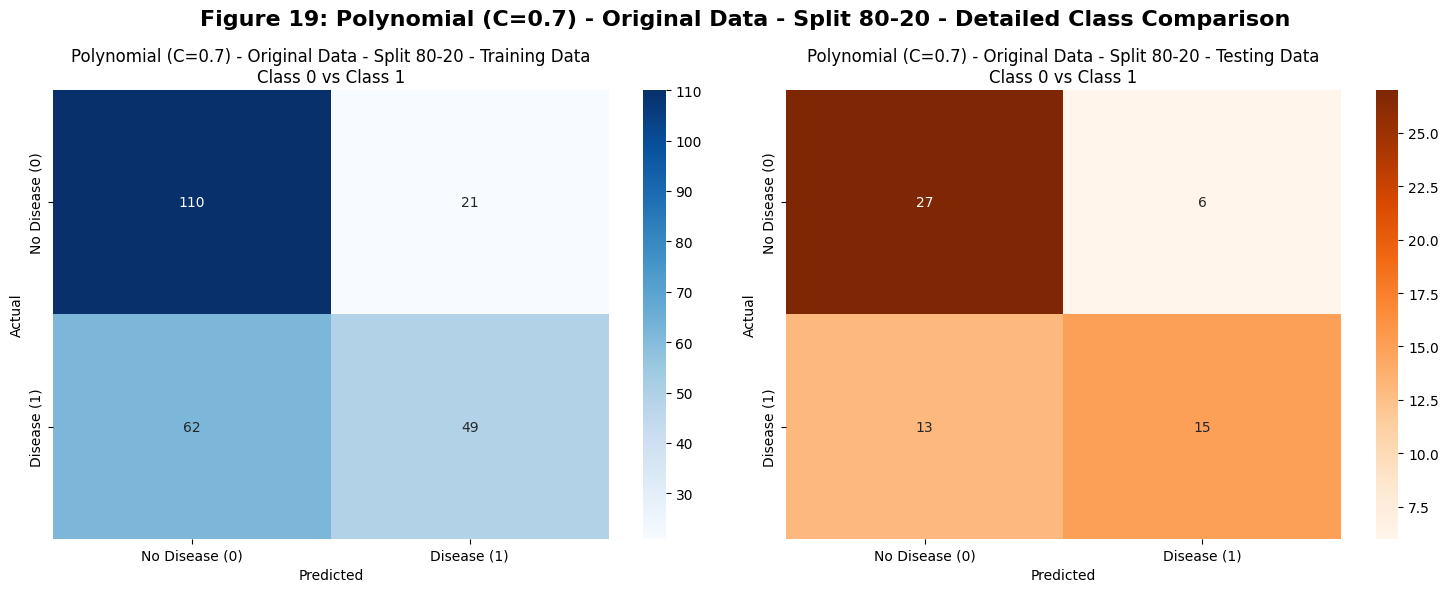


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 131        | 172        |
| 1         | 111        | 70         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 33         | 40         |
| 1         | 28         | 21         |
+-----------+------------+------------+

Polynomial (C=0.7) (Original) - Training Metrics:
Overall Accuracy:  0.6570

Class 0 (No Disease):
• Precision: 0.6395
• Recall:    0.8397
• F1-Score:  0.7261

Class 1 (Disease):
• Precision: 0.7000
• Recall:    0.4414
• F1-Score:  0.5414

Macro Avg:
• Precision: 0.6698
• Recall:    0.6406
• F1-Score:  0.6338

Polynomial (C=0.7) (Original) - Testing Metrics:
Overall Accuracy:  0.6885

Class 0 (No Disease):
• Precision: 0.6750
• Recall:    0.8

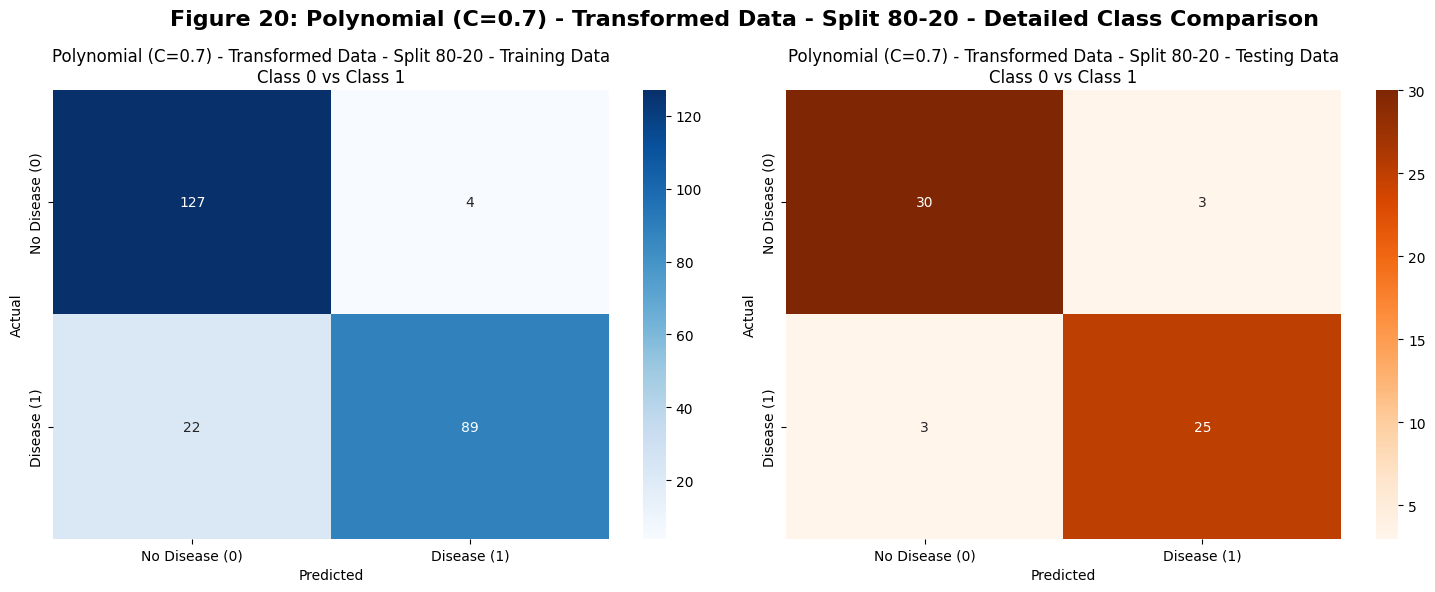


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 131        | 149        |
| 1         | 111        | 93         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 33         | 33         |
| 1         | 28         | 28         |
+-----------+------------+------------+

Polynomial (C=0.7) (Transformed) - Training Metrics:
Overall Accuracy:  0.8926

Class 0 (No Disease):
• Precision: 0.8523
• Recall:    0.9695
• F1-Score:  0.9071

Class 1 (Disease):
• Precision: 0.9570
• Recall:    0.8018
• F1-Score:  0.8725

Macro Avg:
• Precision: 0.9047
• Recall:    0.8856
• F1-Score:  0.8898

Polynomial (C=0.7) (Transformed) - Testing Metrics:
Overall Accuracy:  0.9016

Class 0 (No Disease):
• Precision: 0.9091
• Recall: 

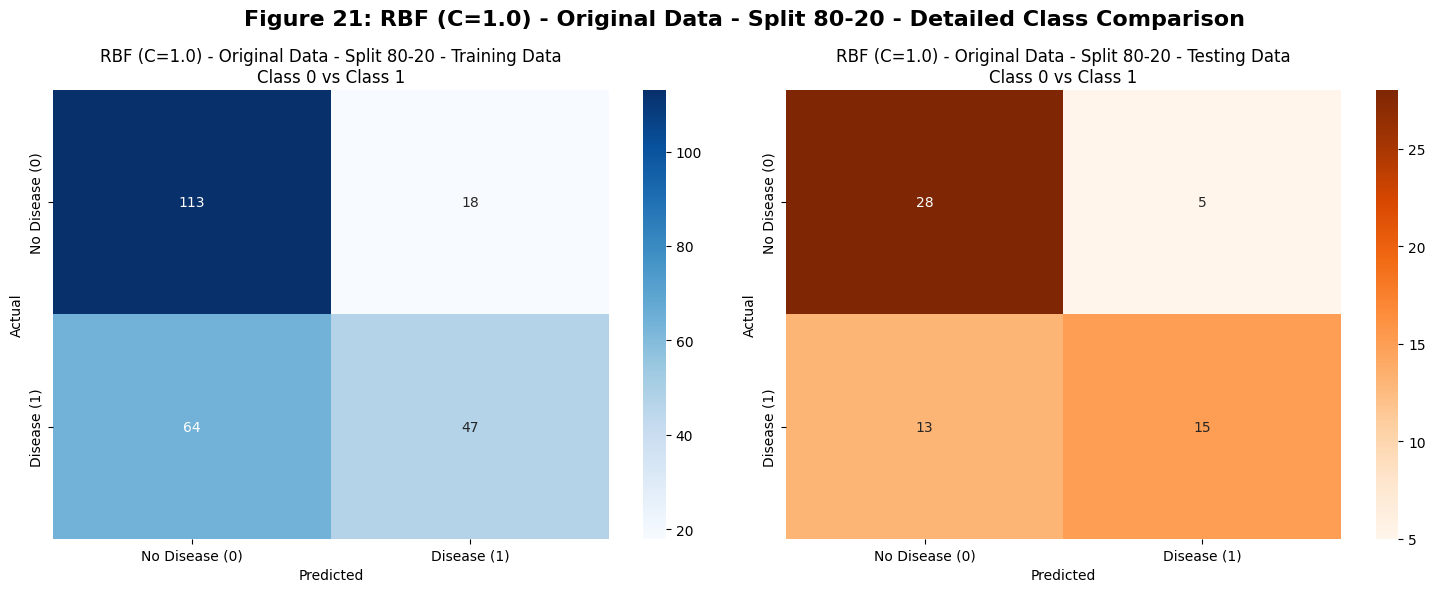


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 131        | 177        |
| 1         | 111        | 65         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 33         | 41         |
| 1         | 28         | 20         |
+-----------+------------+------------+

RBF (C=1.0) (Original) - Training Metrics:
Overall Accuracy:  0.6612

Class 0 (No Disease):
• Precision: 0.6384
• Recall:    0.8626
• F1-Score:  0.7338

Class 1 (Disease):
• Precision: 0.7231
• Recall:    0.4234
• F1-Score:  0.5341

Macro Avg:
• Precision: 0.6807
• Recall:    0.6430
• F1-Score:  0.6339

RBF (C=1.0) (Original) - Testing Metrics:
Overall Accuracy:  0.7049

Class 0 (No Disease):
• Precision: 0.6829
• Recall:    0.8485
• F1-Score

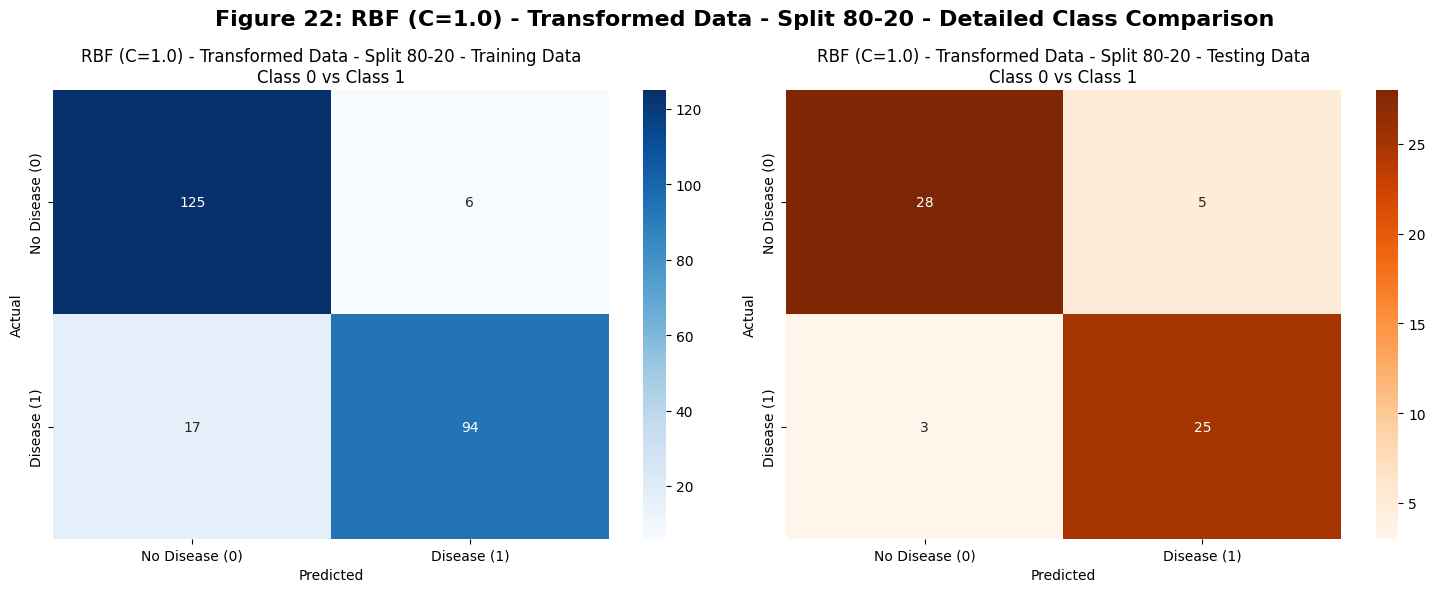


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 131        | 142        |
| 1         | 111        | 100        |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 33         | 31         |
| 1         | 28         | 30         |
+-----------+------------+------------+

RBF (C=1.0) (Transformed) - Training Metrics:
Overall Accuracy:  0.9050

Class 0 (No Disease):
• Precision: 0.8803
• Recall:    0.9542
• F1-Score:  0.9158

Class 1 (Disease):
• Precision: 0.9400
• Recall:    0.8468
• F1-Score:  0.8910

Macro Avg:
• Precision: 0.9101
• Recall:    0.9005
• F1-Score:  0.9034

RBF (C=1.0) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8689

Class 0 (No Disease):
• Precision: 0.9032
• Recall:    0.8485
• F1

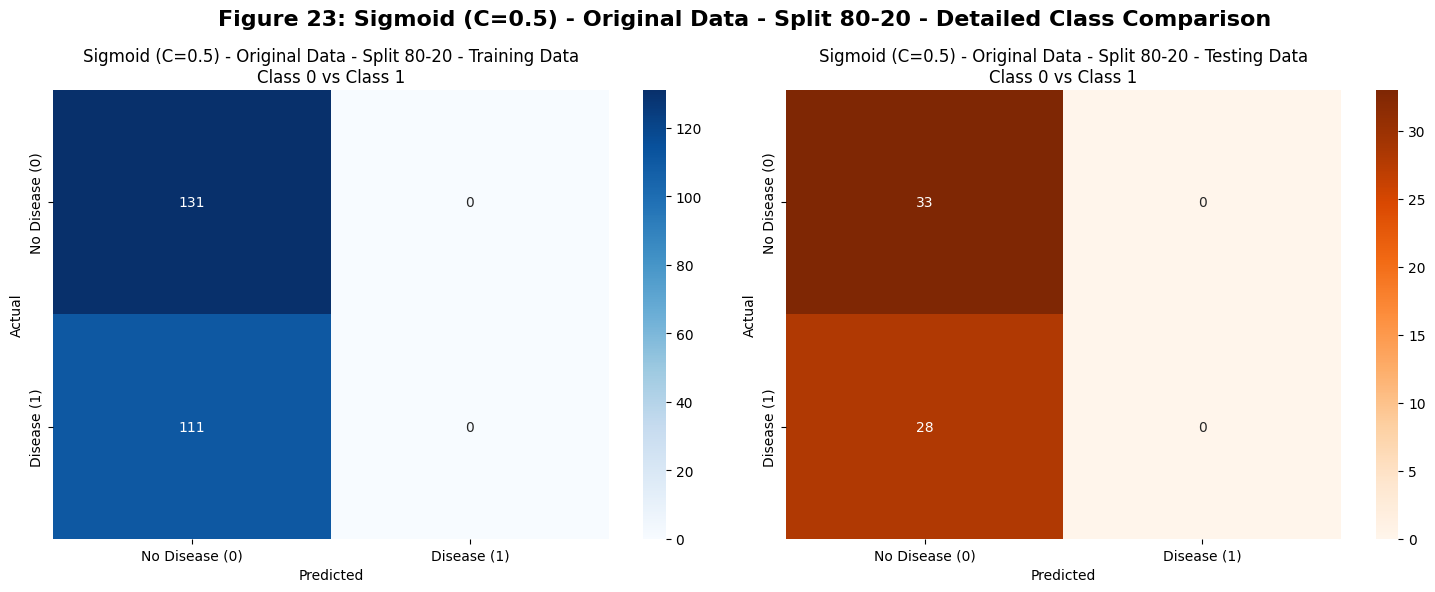


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 131        | 242        |
| 1         | 111        | 0          |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 33         | 61         |
| 1         | 28         | 0          |
+-----------+------------+------------+

Sigmoid (C=0.5) (Original) - Training Metrics:
Overall Accuracy:  0.5413

Class 0 (No Disease):
• Precision: 0.5413
• Recall:    1.0000
• F1-Score:  0.7024

Class 1 (Disease):
• Precision: 0.0000
• Recall:    0.0000
• F1-Score:  0.0000

Macro Avg:
• Precision: 0.2707
• Recall:    0.5000
• F1-Score:  0.3512

Sigmoid (C=0.5) (Original) - Testing Metrics:
Overall Accuracy:  0.5410

Class 0 (No Disease):
• Precision: 0.5410
• Recall:    1.0000
• 

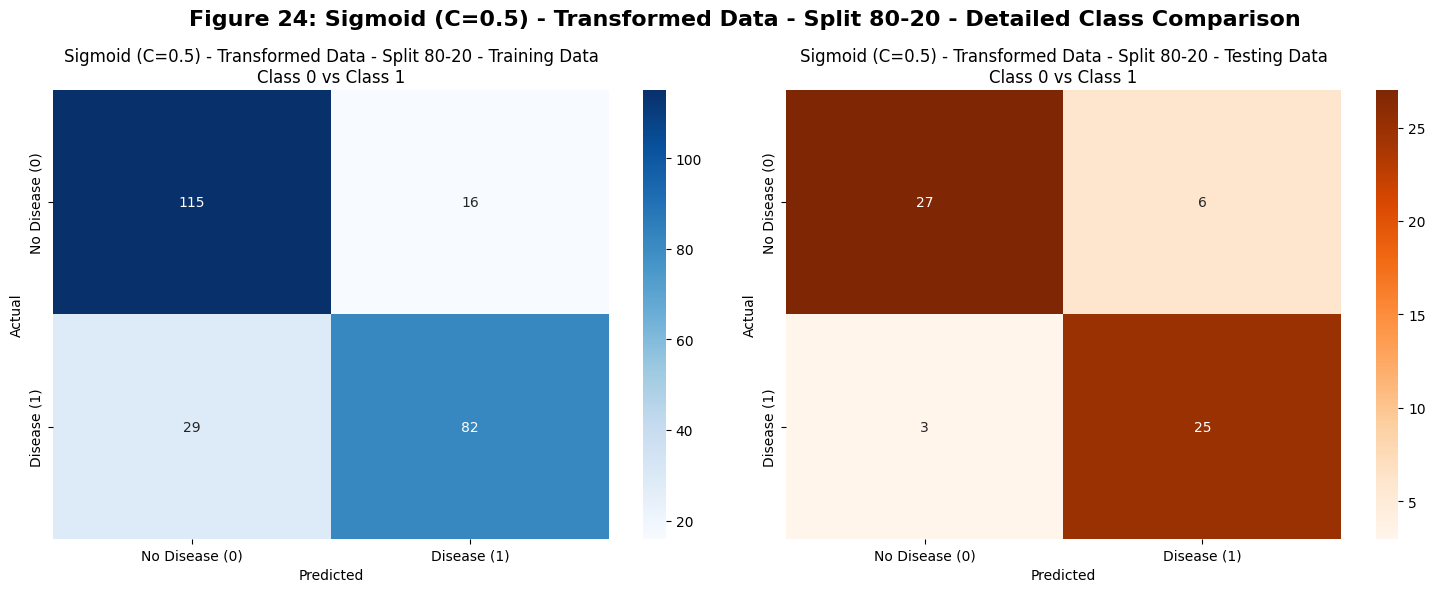


Class Distribution - Training Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 131        | 144        |
| 1         | 111        | 98         |
+-----------+------------+------------+

Class Distribution - Testing Data:
+-----------+------------+------------+
| Class     | Actual     | Predicted  |
+-----------+------------+------------+
| 0         | 33         | 30         |
| 1         | 28         | 31         |
+-----------+------------+------------+

Sigmoid (C=0.5) (Transformed) - Training Metrics:
Overall Accuracy:  0.8140

Class 0 (No Disease):
• Precision: 0.7986
• Recall:    0.8779
• F1-Score:  0.8364

Class 1 (Disease):
• Precision: 0.8367
• Recall:    0.7387
• F1-Score:  0.7847

Macro Avg:
• Precision: 0.8177
• Recall:    0.8083
• F1-Score:  0.8105

Sigmoid (C=0.5) (Transformed) - Testing Metrics:
Overall Accuracy:  0.8525

Class 0 (No Disease):
• Precision: 0.9000
• Recall:    0.8

In [ ]:
# ========================================
# BAB 5: EVALUASI MODEL
# ========================================
print("\n" + "="*50)
print("BAB 5: EVALUASI MODEL")
print("="*50)
def plot_confusion_matrices(cm_train, cm_test, title_prefix, figure_num):
    """Fungsi untuk membuat visualisasi confusion matrix training dan testing"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    # Training Confusion Matrix dengan detail class
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=['No Disease (0)', 'Disease (1)'],
                yticklabels=['No Disease (0)', 'Disease (1)'])
    ax1.set_title(f'{title_prefix} - Training Data\nClass 0 vs Class 1')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    # Testing Confusion Matrix dengan detail class
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges', ax=ax2,
                xticklabels=['No Disease (0)', 'Disease (1)'],
                yticklabels=['No Disease (0)', 'Disease (1)'])
    ax2.set_title(f'{title_prefix} - Testing Data\nClass 0 vs Class 1')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    plt.suptitle(f'Figure {figure_num}: {title_prefix} - Detailed Class Comparison',
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    return fig
def print_class_distribution(y_true, y_pred, data_type):
    """Fungsi untuk menampilkan distribusi prediksi per class"""
    # Hitung jumlah aktual dan prediksi per class
    actual_counts = pd.Series(y_true).value_counts().sort_index()
    pred_counts = pd.Series(y_pred).value_counts().sort_index()
    print(f"\nClass Distribution - {data_type}:")
    print("+-----------+------------+------------+")
    print("| Class     | Actual     | Predicted  |")
    print("+-----------+------------+------------+")
    for cls in [0, 1]:
        print(f"| {cls}         | {actual_counts.get(cls, 0):<10} | {pred_counts.get(cls, 0):<10} |")
    print("+-----------+------------+------------+")
def print_detailed_metrics(y_true, y_pred, data_type, model_name):
    """Fungsi untuk menampilkan metrik evaluasi detail per class"""
    # Metrik overall
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    # Metrik per class
    report = classification_report(y_true, y_pred, target_names=['No Disease', 'Disease'], output_dict=True)
    print(f"\n{model_name} - {data_type} Metrics:")
    print("="*50)
    print(f"Overall Accuracy:  {accuracy:.4f}")
    print("\nClass 0 (No Disease):")
    print(f"• Precision: {report['No Disease']['precision']:.4f}")
    print(f"• Recall:    {report['No Disease']['recall']:.4f}")
    print(f"• F1-Score:  {report['No Disease']['f1-score']:.4f}")
    print("\nClass 1 (Disease):")
    print(f"• Precision: {report['Disease']['precision']:.4f}")
    print(f"• Recall:    {report['Disease']['recall']:.4f}")
    print(f"• F1-Score:  {report['Disease']['f1-score']:.4f}")
    print("\nMacro Avg:")
    print(f"• Precision: {report['macro avg']['precision']:.4f}")
    print(f"• Recall:    {report['macro avg']['recall']:.4f}")
    print(f"• F1-Score:  {report['macro avg']['f1-score']:.4f}")
    print("="*50)
    return accuracy, precision, recall, f1
# Dictionary untuk menyimpan semua hasil
all_results = {}
figure_counter = 1
# Evaluasi untuk setiap kombinasi split dan model
for split_name, split_data in data_splits.items():
    print(f"\n{'='*70}")
    print(f"EVALUASI UNTUK DATA SPLIT: {split_name}")
    print(f"{'='*70}")

    # Dictionary untuk menyimpan hasil split ini
    split_results = {}

    for svm_config in svm_configs:
        for data_type in ['original', 'transformed']:
            print(f"\n{'-'*60}")
            print(f"Model: {svm_config['name']} - Data: {data_type.title()} - Split: {split_name}")
            print(f"{'-'*60}")

            # Pilih data yang sesuai
            if data_type == 'original':
                X_train = split_data['X_train']
                X_test = split_data['X_test']
            else:
                X_train = split_data['X_train_scaled']
                X_test = split_data['X_test_scaled']

            y_train = split_data['y_train']
            y_test = split_data['y_test']

            # Train dan evaluate model
            model, y_train_pred, y_test_pred = train_evaluate_svm(
                X_train, X_test, y_train, y_test, svm_config
            )

            # Confusion Matrix
            cm_train = confusion_matrix(y_train, y_train_pred)
            cm_test = confusion_matrix(y_test, y_test_pred)

            print("Confusion Matrix - Training:")
            print(cm_train)
            print("\nConfusion Matrix - Testing:")
            print(cm_test)

            # Visualisasi
            title = f"{svm_config['name']} - {data_type.title()} Data - Split {split_name}"
            fig = plot_confusion_matrices(cm_train, cm_test, title, figure_counter)
            figure_counter += 1

            # Distribusi class
            print_class_distribution(y_train, y_train_pred, "Training Data")
            print_class_distribution(y_test, y_test_pred, "Testing Data")

            # Metrik detail
            acc_train, prec_train, rec_train, f1_train = print_detailed_metrics(
                y_train, y_train_pred, "Training", f"{svm_config['name']} ({data_type.title()})"
            )
            acc_test, prec_test, rec_test, f1_test = print_detailed_metrics(
                y_test, y_test_pred, "Testing", f"{svm_config['name']} ({data_type.title()})"
            )

            # Simpan hasil
            key = f"{svm_config['name']}_{data_type}"
            split_results[key] = {
                'model': model,
                'cm_train': cm_train,
                'cm_test': cm_test,
                'acc_train': acc_train, 'acc_test': acc_test,
                'prec_train': prec_train, 'prec_test': prec_test,
                'rec_train': rec_train, 'rec_test': rec_test,
                'f1_train': f1_train, 'f1_test': f1_test,
                'y_train_pred': y_train_pred,
                'y_test_pred': y_test_pred
            }

    all_results[split_name] = split_results

In [ ]:
# ========================================
# BAB 6: ANALISIS PERBANDINGAN MODEL
# ========================================
print("\n" + "="*70)
print("BAB 6: ANALISIS PERBANDINGAN MODEL")
print("="*70)

# Menyimpan hasil terbaik global
best_models = []

# Proses setiap rasio split
for split_name, split_results in all_results.items():
    comparison_data = []

    for key, results in split_results.items():
        model_name, data_type = key.rsplit('_', 1)
        comparison_data.append({
            'Model': f"{model_name} ({data_type.title()})",
            'Testing_Accuracy': results['acc_test'],
            'Testing_Precision': results['prec_test'],
            'Testing_Recall': results['rec_test'],
            'Testing_F1': results['f1_test']
        })

    comparison_df = pd.DataFrame(comparison_data)

    # Menentukan model terbaik untuk setiap metrik
    best_acc = comparison_df.loc[comparison_df['Testing_Accuracy'].idxmax()]
    best_prec = comparison_df.loc[comparison_df['Testing_Precision'].idxmax()]
    best_rec = comparison_df.loc[comparison_df['Testing_Recall'].idxmax()]
    best_f1 = comparison_df.loc[comparison_df['Testing_F1'].idxmax()]

    # Cetak kesimpulan
    print(f"\nKESIMPULAN UNTUK SPLIT {split_name}")
    print("="*50)
    print(f"✔️ Model Terbaik (Accuracy)     : {best_acc['Model']} | Skor: {best_acc['Testing_Accuracy']:.4f}")
    print(f"✔️ Model Terbaik (Precision)    : {best_prec['Model']} | Skor: {best_prec['Testing_Precision']:.4f}")
    print(f"✔️ Model Terbaik (Recall)       : {best_rec['Model']} | Skor: {best_rec['Testing_Recall']:.4f}")
    print(f"✔️ Model Terbaik (F1-Score)     : {best_f1['Model']} | Skor: {best_f1['Testing_F1']:.4f}")

    # Simpan untuk analisis gabungan jika perlu
    best_models.append({
        'Split': split_name,
        'Best_Accuracy_Model': best_acc['Model'],
        'Best_Accuracy_Score': best_acc['Testing_Accuracy'],
        'Best_Precision_Model': best_prec['Model'],
        'Best_Precision_Score': best_prec['Testing_Precision'],
        'Best_Recall_Model': best_rec['Model'],
        'Best_Recall_Score': best_rec['Testing_Recall'],
        'Best_F1_Model': best_f1['Model'],
        'Best_F1_Score': best_f1['Testing_F1']
    })

# Menyimpan seluruh performa model dalam list
all_comparisons = []

# Loop semua rasio split
for split_name, split_results in all_results.items():
    for key, results in split_results.items():
        model_name, data_type = key.rsplit('_', 1)
        all_comparisons.append({
            'Split': split_name,
            'Model': f"{model_name} ({data_type.title()})",
            'Accuracy': results['acc_test'],
            'Precision': results['prec_test'],
            'Recall': results['rec_test'],
            'F1': results['f1_test']
        })

# Ubah ke DataFrame
df_all = pd.DataFrame(all_comparisons)

# Hitung rata-rata skor dari semua metrik untuk setiap model
df_all['Average_Score'] = df_all[['Accuracy', 'Precision', 'Recall', 'F1']].mean(axis=1)

# Ambil baris dengan skor rata-rata tertinggi
best_model_row = df_all.loc[df_all['Average_Score'].idxmax()]

# Cetak kesimpulan akhir
print("\n" + "="*70)
print("KESIMPULAN AKHIR: MODEL TERBAIK SECARA GLOBAL")
print("="*70)
print(f"📌 Model Terbaik      : {best_model_row['Model']}")
print(f"📌 Rasio Split        : {best_model_row['Split']}")
print(f"📌 Rata-rata Skor     : {best_model_row['Average_Score']:.4f}")
print(f"  - Accuracy  : {best_model_row['Accuracy']:.4f}")
print(f"  - Precision : {best_model_row['Precision']:.4f}")
print(f"  - Recall    : {best_model_row['Recall']:.4f}")
print(f"  - F1 Score  : {best_model_row['F1']:.4f}")



BAB 6: ANALISIS PERBANDINGAN MODEL

KESIMPULAN UNTUK SPLIT 60-40
✔️ Model Terbaik (Accuracy)     : RBF (C=1.0) (Transformed) | Skor: 0.8607
✔️ Model Terbaik (Precision)    : Polynomial (C=0.7) (Transformed) | Skor: 0.9130
✔️ Model Terbaik (Recall)       : Linear (C=0.3) (Original) | Skor: 0.8214
✔️ Model Terbaik (F1-Score)     : RBF (C=1.0) (Transformed) | Skor: 0.8411

KESIMPULAN UNTUK SPLIT 70-30
✔️ Model Terbaik (Accuracy)     : Polynomial (C=0.7) (Transformed) | Skor: 0.8462
✔️ Model Terbaik (Precision)    : Polynomial (C=0.7) (Transformed) | Skor: 0.8889
✔️ Model Terbaik (Recall)       : Linear (C=0.3) (Original) | Skor: 0.8095
✔️ Model Terbaik (F1-Score)     : Polynomial (C=0.7) (Transformed) | Skor: 0.8205

KESIMPULAN UNTUK SPLIT 80-20
✔️ Model Terbaik (Accuracy)     : Polynomial (C=0.7) (Transformed) | Skor: 0.9016
✔️ Model Terbaik (Precision)    : Polynomial (C=0.7) (Transformed) | Skor: 0.8929
✔️ Model Terbaik (Recall)       : Linear (C=0.3) (Original) | Skor: 0.8929
✔️ Mode

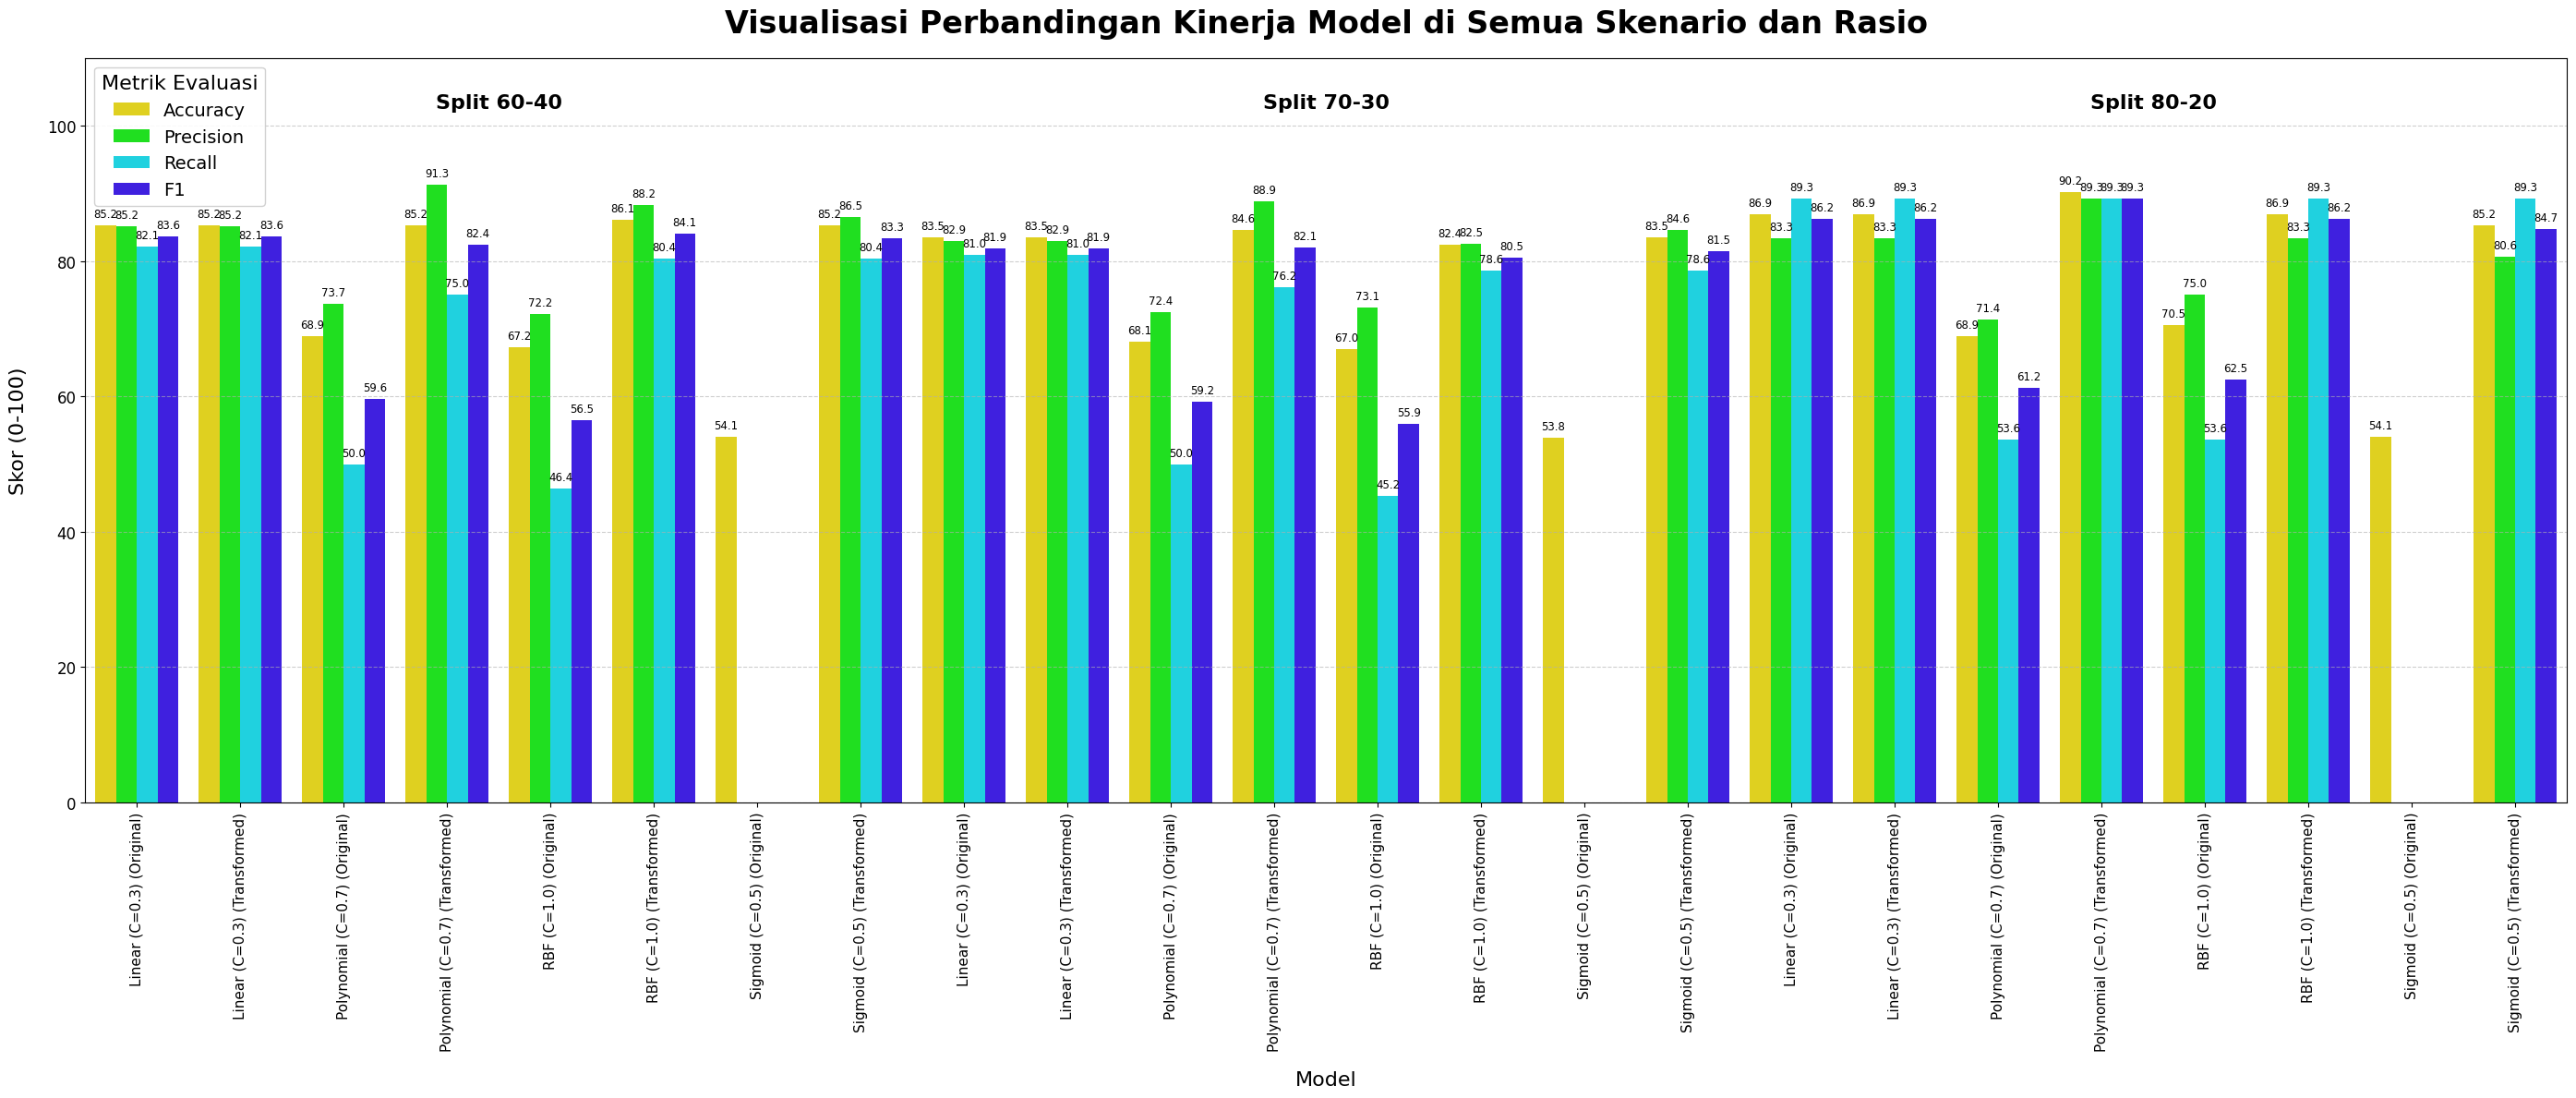

In [ ]:
# =================================================================
# BAB 7 : KESIMPULAN AKHIR VISUALISASI SELURUH SKENARIO
# =================================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ubah format data dari wide ke long
melted_df = pd.melt(
    df_all,
    id_vars=['Model', 'Split'],
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1'],
    var_name='Metric',
    value_name='Score'
)

# Skor dikonversi ke skala 0–100
melted_df['Score'] = melted_df['Score'] * 100

# Buat kombinasi label unik untuk setiap bar
melted_df['Split_Model'] = melted_df['Split'] + '\n' + melted_df['Model']

# Atur urutan kategori split
split_order = ['60-40', '70-30', '80-20']
melted_df['Split'] = pd.Categorical(melted_df['Split'], categories=split_order, ordered=True)
melted_df = melted_df.sort_values(by=['Split', 'Model'])

# Buat plot
plt.figure(figsize=(28, 12))
barplot = sns.barplot(
    data=melted_df,
    x='Split_Model',
    y='Score',
    hue='Metric',
    palette='gist_rainbow'
)

# Loop melalui setiap bar di plot untuk menambahkan anotasi nilai
for p in barplot.patches:
    if p.get_height() > 0:  # Hanya tampilkan label jika nilainya > 0
        barplot.annotate(f'{p.get_height():.1f}', # Format teks (1 angka di belakang koma)
                       (p.get_x() + p.get_width() / 2., p.get_height()), # Posisi (x,y) teks
                       ha = 'center', va = 'center', # Penjajaran horizontal dan vertikal
                       xytext = (0, 9), # Jarak vertikal teks dari puncak bar
                       textcoords = 'offset points',
                       fontsize=8.5, # Ukuran font untuk label
                       color='black') # Warna font

# Ubah label xticks menjadi hanya nama Model
new_labels = [label.get_text().split('\n')[1] for label in barplot.get_xticklabels()]
barplot.set_xticklabels(new_labels, rotation=90, fontsize=11)

# Kustomisasi
plt.title('Visualisasi Perbandingan Kinerja Model di Semua Skenario dan Rasio',
          fontsize=24, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=16, labelpad=15)
plt.ylabel('Skor (0-100)', fontsize=16, labelpad=15)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 110)

# Legenda
legend = plt.legend(title='Metrik Evaluasi', fontsize=14, title_fontsize=16)
legend.get_frame().set_alpha(0.9)

# Tambahkan label grup split di atas
group_positions = []
group_labels = []

for split in split_order:
    subset = melted_df[melted_df['Split'] == split]['Split_Model'].unique()
    positions = [i for i, x in enumerate(melted_df['Split_Model'].unique()) if x in subset]
    if positions:
        middle = sum(positions) / len(positions)
        group_positions.append(middle)
        group_labels.append(f"Split {split}")

for pos, label in zip(group_positions, group_labels):
    plt.text(pos, 102, label, ha='center', va='bottom', fontsize=16, fontweight='bold')

# Tampilkan plot
plt.tight_layout()
plt.show()